<center><img src = "https://www.utphysicians.com/wp-content/uploads/2020/02/Coronavirus-COVID19_2.jpg" width = 600></center>

<h1 align=center><font size = 5>Exploring, Visualizing, and Predicting the Future Number of COVID-19 Cases</font></h1>
<h1 align=center><font size = 4>By Lutfia Afifah</font></h1>

## Introduction
In this notebook, I try to track the spread of novel Coronavirus or also known as COVID-19. This notebook focuses on the cases in Indonesia as well as comparing the cases in around the world. Visualization in this project using Matplotlib for generating graphs such as line plot, bar chart either vertical or horizontal, area plot, and pie chart. I also predict the number of cases for the next 10 days using regression algorithms such as Polynomial Regression, Polynomial Bayesian Ridge, and Support Vector Machine (SVM). This notebook can be accessed on my GitHub [here](https://github.com/lutfiaafifah). Feel free to give me feedback.

## Data
I use time series data from data repository created by John Hopkins CSSE that can be found in this link https://github.com/CSSEGISandData/COVID-19. The data is updated daily.

## Note: 
Since the data updated daily, **RUN THE NOTEBOOK** for  better and more accurate result.
### Last Updated : 04/04/2020

## Table of Content

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Import Libraries and Read the Dataset into *Pandas* Dataframe](#0)<br>
2. [Exploring and Visualizing COVID-19 Cases in Indonesia](#2)<br>
3. [Modeling and Predicting the Number of COVID-19 Cases in Indonesia](#4) <br>
4. [Exploring and Visualizing COVID-19 Cases in the World](#6) <br>
5. [Modeling and Predicting the Number of COVID-19 Cases in the World](#8) <br>
6. [Conclusion](#10) <br>

</div>
<hr>

# Import Libraries and Read the dataset into *Pandas* Dataframe<a id="0"></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import time
from decimal import Decimal
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [2]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
pd.set_option('display.max_columns', None)    # display all columns

In [4]:
df_confirmed.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,7,7,7,7,7,7,9,15,15
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,4,8,18,26,52,78,84,115,136,160,194,235,249,265,290,329,407,424,482,532,571,663,736,770
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,4,6,9,19,32,39,39,53,62,71,77,78,80,84,87,91,93
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,6,6,13,22,22,26,28,38,48,55,65,65,92,112,134,171,210,267,307,353,436,669,669,818,1029,1219,1405,1617,1791,2032,2032,2182,2298,2389,2493


In [5]:
cols = df_confirmed.keys()

# Exploring and Visualizing Covid-19 Cases in Indonesia<a id="2"></a>

For Indonesia cases, I observe the numbers started from column 3/2/20 when the first case to be found in Indonesia.

In [6]:
indonesia_confirmed = df_confirmed[df_confirmed['Country/Region']=='Indonesia'].loc[:, cols[44]:cols[-1]]
indonesia_deaths = df_deaths[df_deaths['Country/Region']=='Indonesia'].loc[:, cols[44]:cols[-1]]
indonesia_recoveries = df_recoveries[df_recoveries['Country/Region']=='Indonesia'].loc[:, cols[44]:cols[-1]]

In [7]:
indonesia_confirmed_tr = indonesia_confirmed.transpose()
indonesia_deaths_tr = indonesia_deaths.transpose()
indonesia_recoveries_tr = indonesia_recoveries.transpose()

Check the columns name for renaming

In [8]:
indonesia_confirmed_tr.head()

,132
3/2/20,2
3/3/20,2
3/4/20,2
3/5/20,2
3/6/20,4


In [9]:
indonesia_deaths_tr.head()

,132
3/2/20,0
3/3/20,0
3/4/20,0
3/5/20,0
3/6/20,0


In [10]:
indonesia_recoveries_tr.head()

,126
3/2/20,0
3/3/20,0
3/4/20,0
3/5/20,0
3/6/20,0


Rename the columns and concatenate three dataframe

In [11]:
# Rename columns
indonesia_confirmed_tr = indonesia_confirmed_tr.rename(columns={132 : 'Confirmed'})
indonesia_deaths_tr = indonesia_deaths_tr.rename(columns={132 : 'Deaths'})
indonesia_recoveries_tr = indonesia_recoveries_tr.rename(columns={126 : 'Recoveries'})

# Join the 3 dataframes
frame = [indonesia_confirmed_tr, indonesia_deaths_tr, indonesia_recoveries_tr]
indonesia_all_cases = pd.concat(frame, axis=1)
indonesia_all_cases.tail()

,Confirmed,Deaths,Recoveries
3/31/20,1528,136,81
4/1/20,1677,157,103
4/2/20,1790,170,112
4/3/20,1986,181,134
4/4/20,2092,191,150


### Coronavirus Cases by Dates 

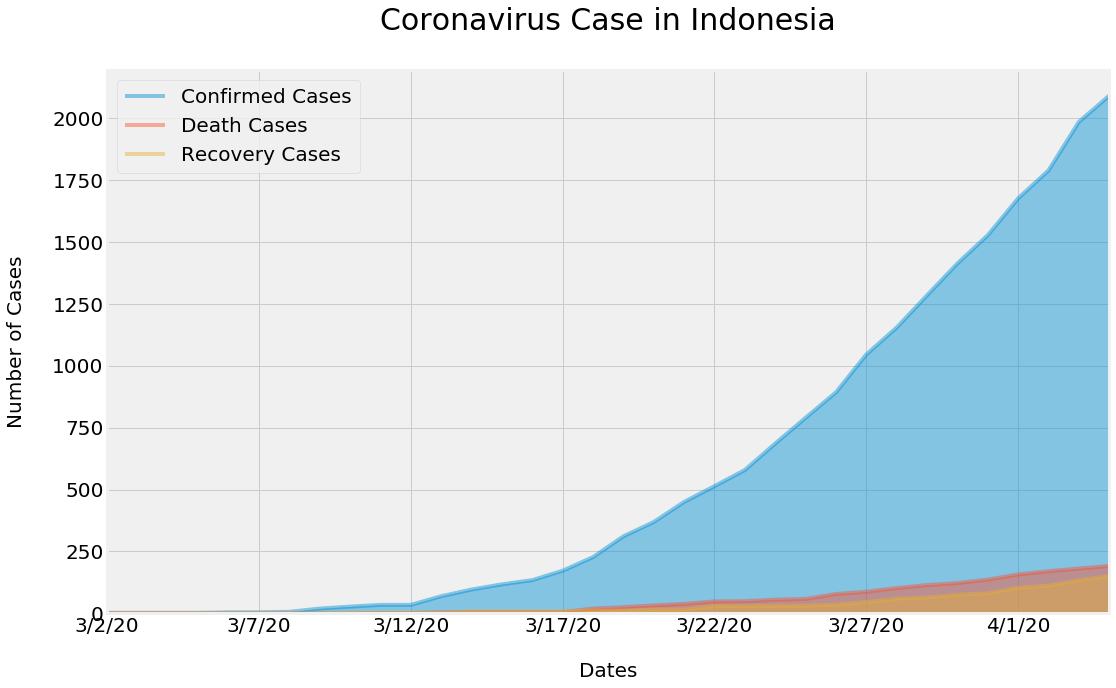

In [12]:
indonesia_all_cases.plot(kind='area', alpha=0.45, stacked=False, figsize=(16, 10))
plt.title('Coronavirus Case in Indonesia\n', size=30)
plt.ylabel('Number of Cases\n', size=20)
plt.xlabel('\nDates', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(['Confirmed Cases', 'Death Cases', 'Recovery Cases'], prop={'size': 20})
plt.show()

### Coronavirus Cases by Number of Days

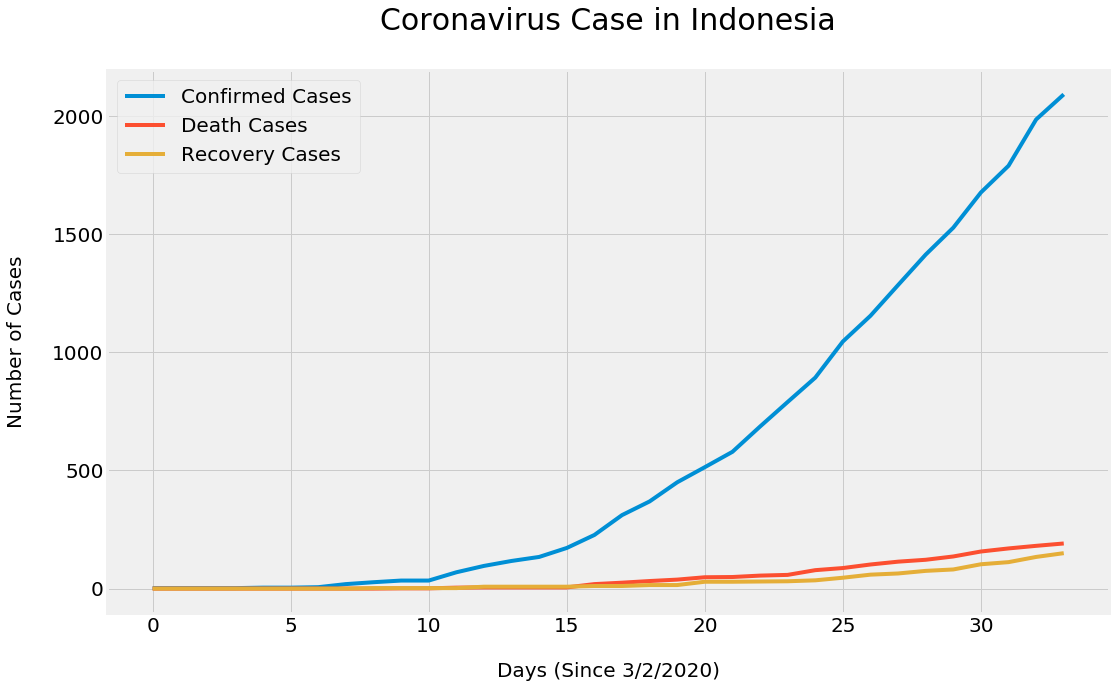

In [13]:
num_of_days = np.array([i for i in range(len(indonesia_all_cases))]).reshape(-1, 1)

plt.figure(figsize=(16, 10))
plt.plot(num_of_days, indonesia_all_cases)
plt.title('Coronavirus Case in Indonesia\n', size=30)
plt.xlabel('\nDays (Since 3/2/2020)', size=20)
plt.ylabel('Number of Cases\n', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(['Confirmed Cases', 'Death Cases', 'Recovery Cases'], prop={'size': 20})
plt.show()

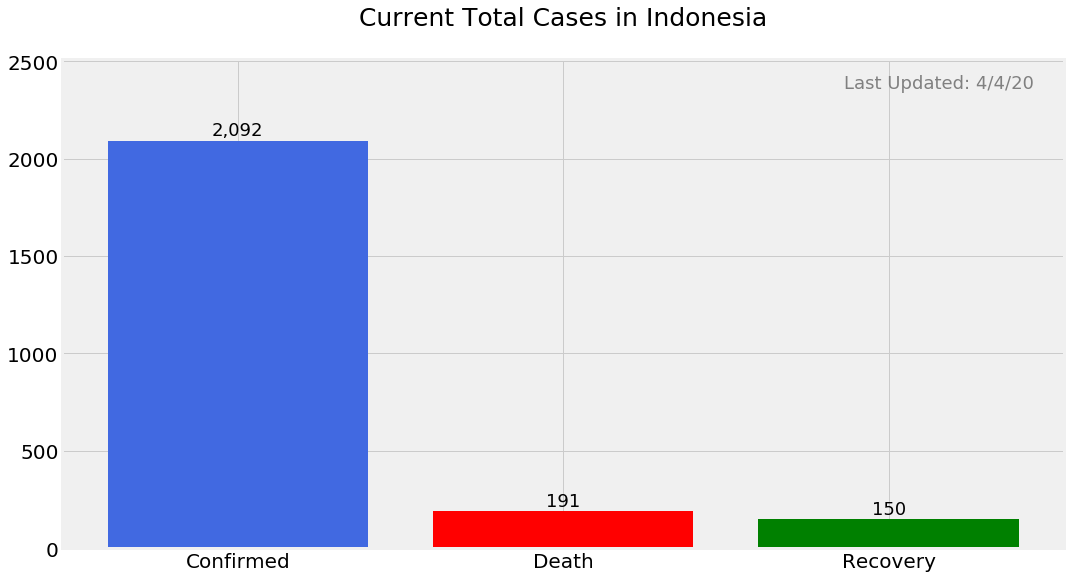

In [14]:
plt.figure(figsize=(16, 9))

indc = indonesia_all_cases['Confirmed'][indonesia_all_cases.index[-1]]
indd = indonesia_all_cases['Deaths'][indonesia_all_cases.index[-1]]
indr = indonesia_all_cases['Recoveries'][indonesia_all_cases.index[-1]]

ind = [indc, indd, indr]
bar2 = plt.bar(['Confirmed','Death','Recovery'], ind, color=['royalblue','red','green'])
for p in bar2:
    height2 = p.get_height()
    plt.text(p.get_x() + p.get_width()/2, height2+100, f'{height2:,}', ha='center', va='top', size=18)

plt.title('Current Total Cases in Indonesia\n', size=25)
plt.text(0.78, 0.94, 'Last Updated: '+cols[-1], size=18, transform=plt.gca().transAxes, color='gray')
plt.margins(0.05, 0.2)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Mortality, Recovery, and Active Cases Rate in Indonesia

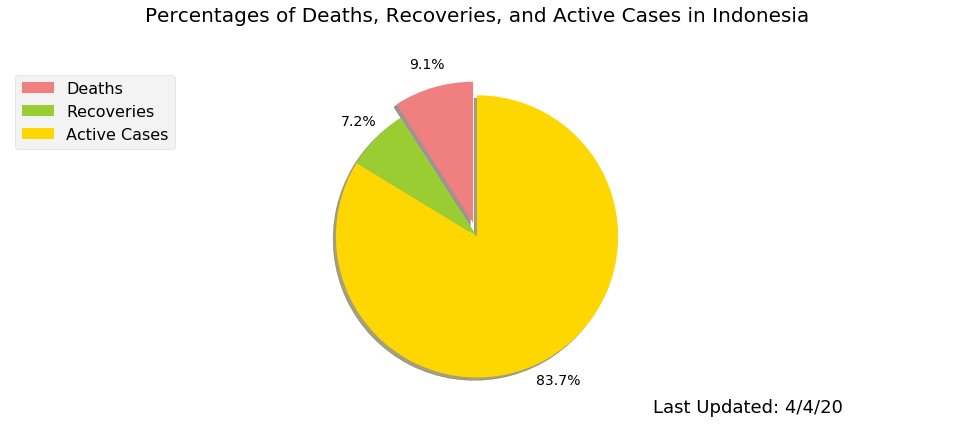

In [15]:
ind_ap = round((indc-indd-indr)/indc*100,1)  # active cases around the world
ind_dp = round(indd/indc*100,1)
ind_rp = round(indr/indc*100,1) 

colors = 'lightcoral', 'yellowgreen', 'gold'
labels = 'Deaths', 'Recoveries', 'Active Cases'
sizes = [ind_dp, ind_rp, ind_ap]
explode = (0.1, 0, 0)  

fig1, ax1 = plt.subplots(figsize=(15,6))
ax1.pie(sizes, explode=explode, labels=None, autopct='%1.1f%%', colors=colors, shadow=True, pctdistance=1.17, startangle=90, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=labels, loc='upper left', fontsize=16)
plt.title('Percentages of Deaths, Recoveries, and Active Cases in Indonesia', y=1.12, size=20) 
plt.text(1.25,-1.25, 'Last Updated: '+cols[-1], size=18)

plt.show()

### Active Cases in Indonesia

In [16]:
indonesia_active_cases = indonesia_all_cases['Confirmed']-indonesia_all_cases['Deaths']-indonesia_all_cases['Recoveries']
print('Active Cases in Indonesia : \n')
print(indonesia_active_cases)

Active Cases in Indonesia : 

3/2/20        2
3/3/20        2
3/4/20        2
3/5/20        2
3/6/20        4
3/7/20        4
3/8/20        6
3/9/20       19
3/10/20      25
3/11/20      31
3/12/20      31
3/13/20      63
3/14/20      83
3/15/20     104
3/16/20     121
3/17/20     159
3/18/20     197
3/19/20     275
3/20/20     322
3/21/20     397
3/22/20     437
3/23/20     501
3/24/20     601
3/25/20     701
3/26/20     780
3/27/20     913
3/28/20     994
3/29/20    1107
3/30/20    1217
3/31/20    1311
4/1/20     1417
4/2/20     1508
4/3/20     1671
4/4/20     1751
dtype: int64


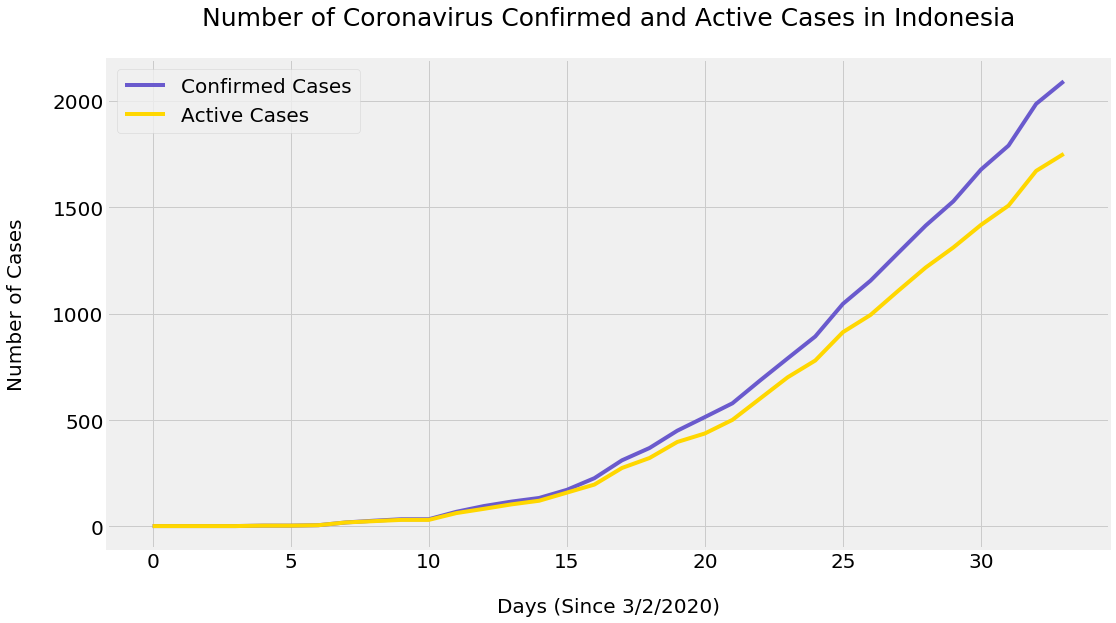

In [17]:
plt.figure(figsize=(16, 9))
plt.plot(num_of_days, indonesia_all_cases['Confirmed'], color='slateblue')
plt.plot(num_of_days, indonesia_active_cases, color='gold')
plt.title('Number of Coronavirus Confirmed and Active Cases in Indonesia\n', size=25)
plt.xlabel('\nDays (Since 3/2/2020)', size=20)
plt.ylabel('Number of Cases\n', size=20)
plt.legend(['Confirmed Cases', 'Active Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [18]:
# function to generate case daily increase
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

### Daily Case Increase

In [19]:
confirmed_daily_increase = daily_increase(indonesia_all_cases['Confirmed'])
death_daily_increase = daily_increase(indonesia_all_cases['Deaths'])
recovery_daily_increase = daily_increase(indonesia_all_cases['Recoveries'])

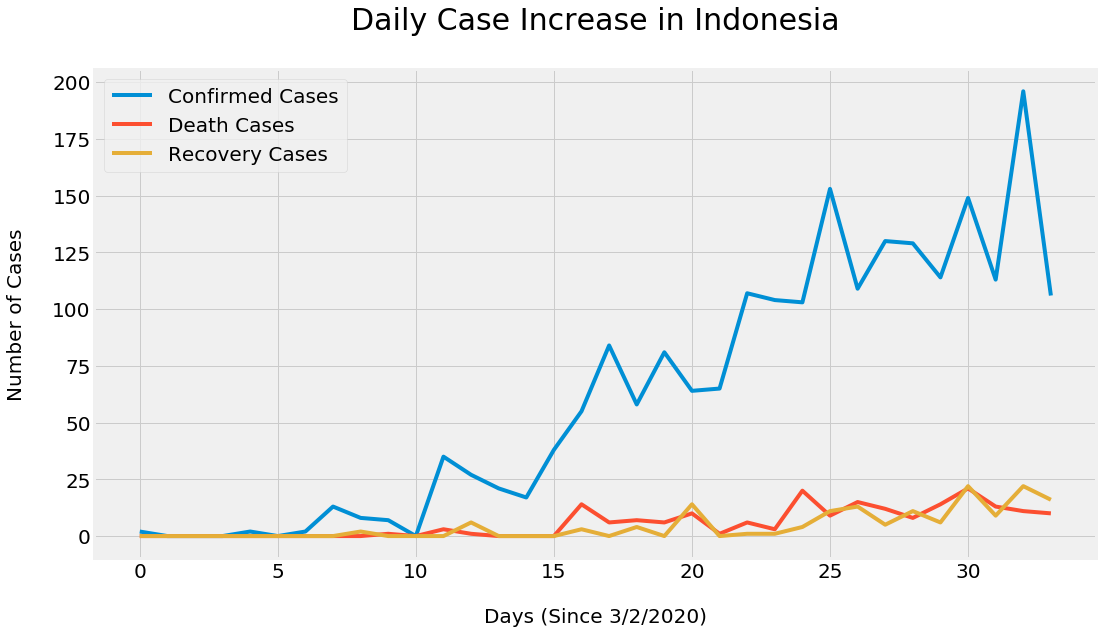

In [20]:
plt.figure(figsize=(16, 9))
plt.plot(num_of_days, confirmed_daily_increase)
plt.plot(num_of_days, death_daily_increase)
plt.plot(num_of_days, recovery_daily_increase)
plt.title('Daily Case Increase in Indonesia\n', size=30)
plt.xlabel('\nDays (Since 3/2/2020)', size=20)
plt.ylabel('Number of Cases\n', size=20)
plt.legend(['Confirmed Cases', 'Death Cases', 'Recovery Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Modeling and Predicting the Number of COVID-19 Cases in Indonesia<a id="4"></a>

For splitting the data, I use 80-20 proportion with 80% used for training data and 20% used for testing data. I also set the Shuffle parameter into False in order not to randomize the splitting. So, the first 80% of the data will be used as the training data dan the last 20% will be used as the testing data.

### Train Test Split

In [21]:
start = '3/2/2020'   # define start date for Indonesia's cases
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast = np.array([i for i in range(len(indonesia_all_cases)+10)]).reshape(-1, 1)

future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
    
# Train test split
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(num_of_days, indonesia_confirmed_tr, test_size=0.20, shuffle=False) 

### Polynomial Regression

MAE: 105.45021752767346
MSE: 15922.387647904643


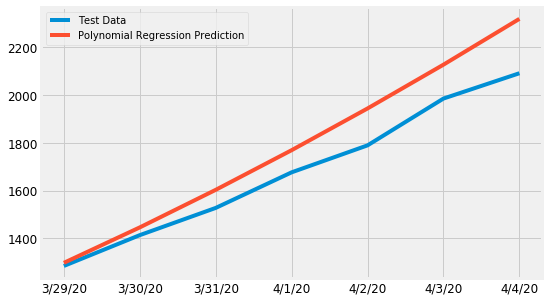

In [22]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

# polynomial regression
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)

plt.figure(figsize=(8, 5))
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Prediction'])
plt.xticks(size=12)
plt.yticks(size=12)

print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

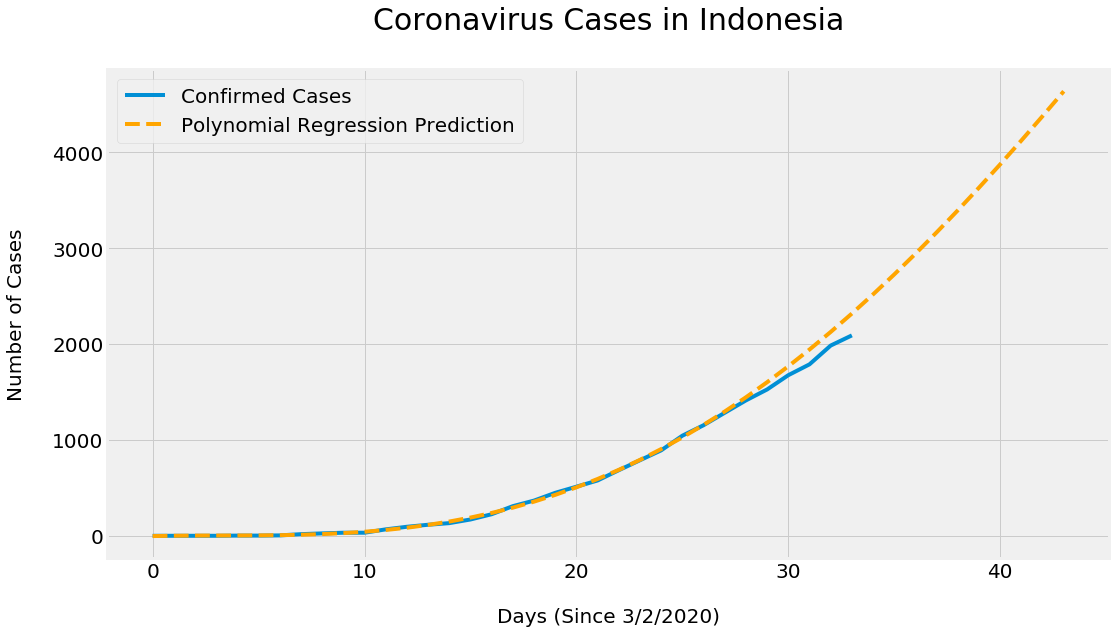

In [23]:
plt.figure(figsize=(16, 9))
plt.plot(num_of_days, indonesia_confirmed_tr)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('Coronavirus Cases in Indonesia\n', size=30)
plt.xlabel('\nDays (Since 3/2/2020)', size=20)
plt.ylabel('Number of Cases\n', size=20)
plt.legend(['Confirmed Cases', 'Polynomial Regression Prediction'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Result for Polynomial Regression

In [24]:
# Future predictions using Polynomial Regression 
linear_pred = linear_pred.reshape(1,-1)[0]
print('Polynomial regression\'s prediction for the next 10 days in Indonesia :')
set(zip(future_forcast_dates[-10:], np.round(linear_pred[-10:])))

Polynomial regression's prediction for the next 10 days in Indonesia :


{('04/05/2020', 2520.0),
 ('04/06/2020', 2728.0),
 ('04/07/2020', 2943.0),
 ('04/08/2020', 3166.0),
 ('04/09/2020', 3396.0),
 ('04/10/2020', 3633.0),
 ('04/11/2020', 3876.0),
 ('04/12/2020', 4125.0),
 ('04/13/2020', 4379.0),
 ('04/14/2020', 4638.0)}

###  Bayesian Ridge

C:\Users\levono\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 230.71252392897046
MSE: 74279.16500988127


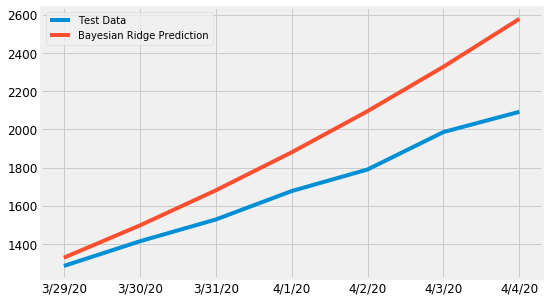

In [25]:
bayesian = BayesianRidge(fit_intercept=False)
bayesian.fit(poly_X_train_confirmed, y_train_confirmed)
test_bayesian_pred = bayesian.predict(poly_X_test_confirmed)
bayesian_pred = bayesian.predict(poly_future_forcast)

plt.figure(figsize=(8, 5))
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Prediction'])
plt.xticks(size=12)
plt.yticks(size=12)

print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

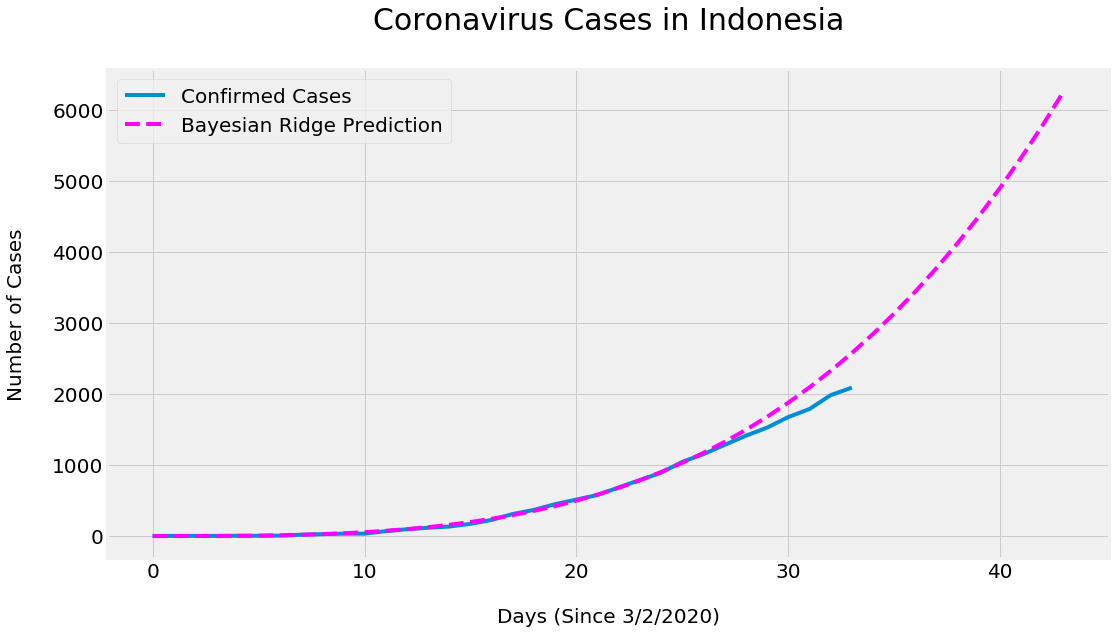

In [26]:
plt.figure(figsize=(16, 9))
plt.plot(num_of_days, indonesia_confirmed_tr)
plt.plot(future_forcast, bayesian_pred, linestyle='dashed', color='magenta')
plt.title('Coronavirus Cases in Indonesia\n', size=30)
plt.xlabel('\nDays (Since 3/2/2020)', size=20)
plt.ylabel('Number of Cases\n', size=20)
plt.legend(['Confirmed Cases', 'Bayesian Ridge Prediction'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Result for Bayesian Ridge

In [27]:
# Future predictions using Bayesian Ridge
print('Bayesian Ridge\'s prediction for the next 10 days in Indonesia :')
set(zip(future_forcast_dates[-10:], np.round(bayesian_pred[-10:])))

Bayesian Ridge's prediction for the next 10 days in Indonesia :


{('04/05/2020', 2848.0),
 ('04/06/2020', 3137.0),
 ('04/07/2020', 3447.0),
 ('04/08/2020', 3778.0),
 ('04/09/2020', 4132.0),
 ('04/10/2020', 4508.0),
 ('04/11/2020', 4909.0),
 ('04/12/2020', 5335.0),
 ('04/13/2020', 5788.0),
 ('04/14/2020', 6267.0)}

### Predicting with Support Vector Machine (SVM)

In [28]:
svm = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1, degree=4, C=0.1)
svm.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm.predict(future_forcast)

C:\Users\levono\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 381.7769597219844
MSE: 212392.286366033


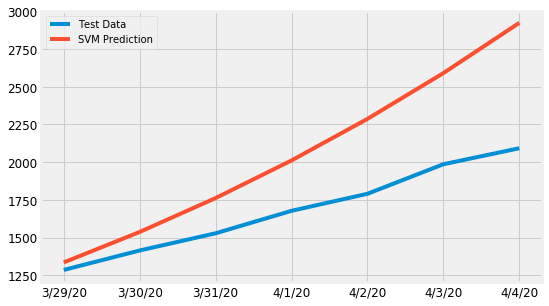

In [29]:
svm_test_pred = svm.predict(X_test_confirmed)

plt.figure(figsize=(8,5))
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Prediction'])
plt.xticks(size=12)
plt.yticks(size=12)

print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

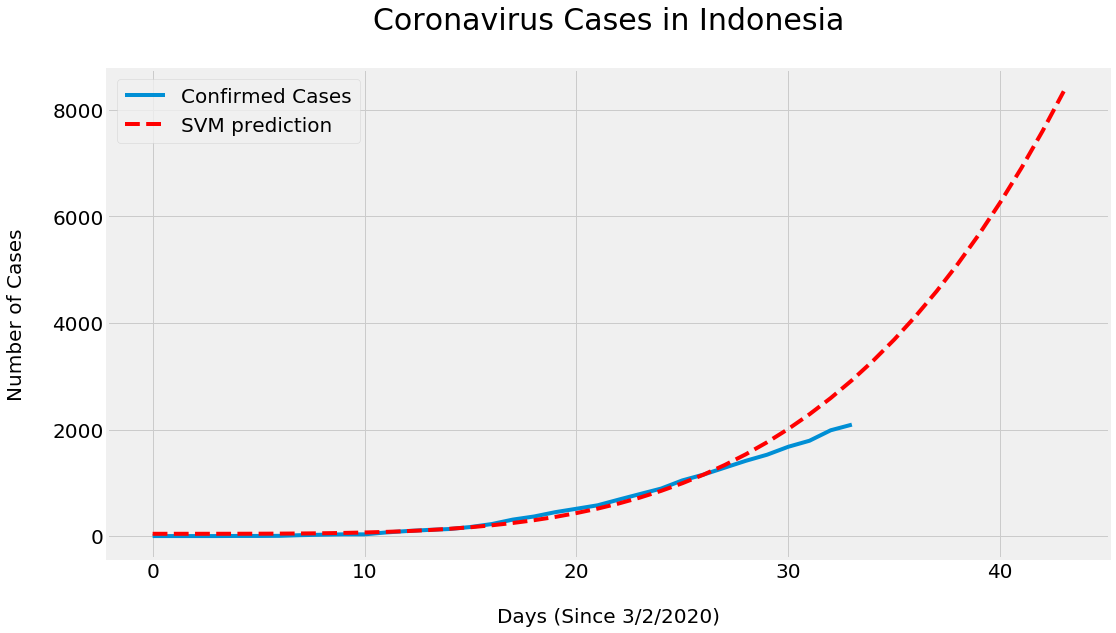

In [30]:
plt.figure(figsize=(16, 9))
plt.plot(num_of_days, indonesia_confirmed_tr)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='red')
plt.title('Coronavirus Cases in Indonesia\n', size=30)
plt.xlabel('\nDays (Since 3/2/2020)', size=20)
plt.ylabel('Number of Cases\n', size=20)
plt.legend(['Confirmed Cases', 'SVM prediction'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Result for SVM

In [31]:
# Future predictions using SVM 
print('SVM\'s prediction for the next 10 days in Indonesia :')
set(zip(future_forcast_dates[-10:], np.round(svm_pred[-10:])))

SVM's prediction for the next 10 days in Indonesia :


{('04/05/2020', 3289.0),
 ('04/06/2020', 3688.0),
 ('04/07/2020', 4122.0),
 ('04/08/2020', 4594.0),
 ('04/09/2020', 5106.0),
 ('04/10/2020', 5661.0),
 ('04/11/2020', 6259.0),
 ('04/12/2020', 6904.0),
 ('04/13/2020', 7598.0),
 ('04/14/2020', 8344.0)}

# Exploring and Visualizing COVID-19 Cases in the World<a id="6"></a>

In [32]:
confirmed = df_confirmed.loc[:, cols[4]:cols[-1]]
deaths = df_deaths.loc[:, cols[4]:cols[-1]]
recoveries = df_recoveries.loc[:, cols[4]:cols[-1]]

In [33]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10


In [34]:
df_confirmed_group = df_confirmed.groupby(['Country/Region']).sum().reset_index()
df_deaths_group = df_deaths.groupby(['Country/Region']).sum().reset_index()
df_recoveries_group = df_recoveries.groupby(['Country/Region']).sum().reset_index()

df_confirmed_group

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10
5,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,7,7,7,7,7,7,9,15,15
6,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451
7,Armenia,40.069100,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,4,8,18,26,52,78,84,115,136,160,194,235,249,265,290,329,407,424,482,532,571,663,736,770
8,Australia,-255.969500,1129.862300,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,30,39,52,55,60,63,76,91,107,128,128,200,250,297,377,452,568,681,791,1071,1549,1682,2044,2364,2810,3143,3640,3984,4361,4559,4862,5116,5330,5550
9,Austria,47.516200,14.550100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,3,9,14,18,21,29,41,55,79,104,131,182,246,302,504,655,860,1018,1332,1646,2013,2388,2814,3582,4474,5283,5588,6909,7657,8271,8788,9618,10180,10711,11129,11524,11781


In [35]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum - death_sum - recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum / confirmed_sum)
    recovery_rate.append(recovered_sum / confirmed_sum)

days = np.array([i for i in range(len(dates))]).reshape(-1, 1)

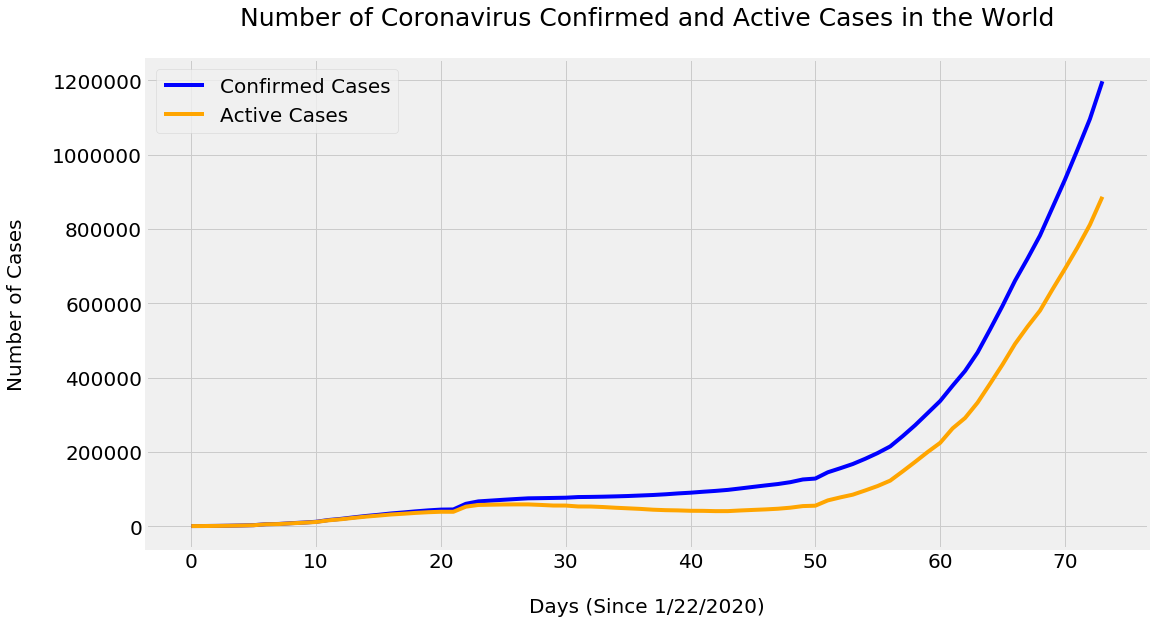

In [36]:
plt.figure(figsize=(16, 9))
plt.plot(days, world_cases, color='blue')
plt.plot(days, total_active, color='orange')
plt.title('Number of Coronavirus Confirmed and Active Cases in the World\n', size=25)
plt.xlabel('\nDays (Since 1/22/2020)', size=20)
plt.ylabel('Number of Cases\n', size=20)
plt.legend(['Confirmed Cases', 'Active Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

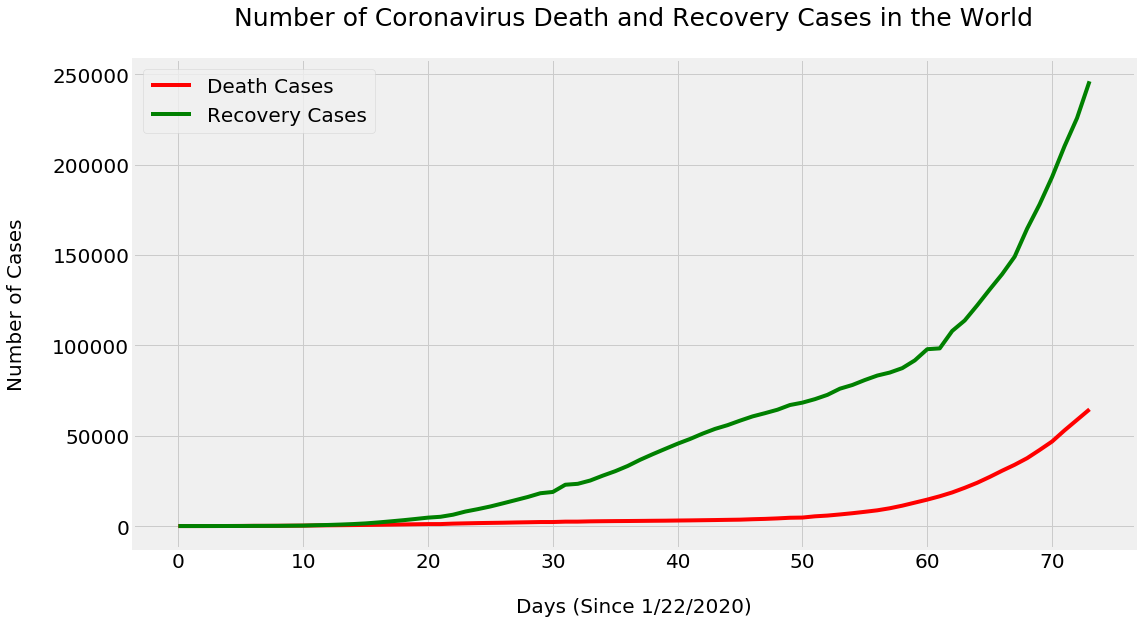

In [37]:
plt.figure(figsize=(16, 9))
plt.plot(days, total_deaths, color='red')
plt.plot(days, total_recovered, color='green')
plt.title('Number of Coronavirus Death and Recovery Cases in the World\n', size=25)
plt.xlabel('\nDays (Since 1/22/2020)', size=20)
plt.ylabel('Number of Cases\n', size=20)
plt.legend(['Death Cases', 'Recovery Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

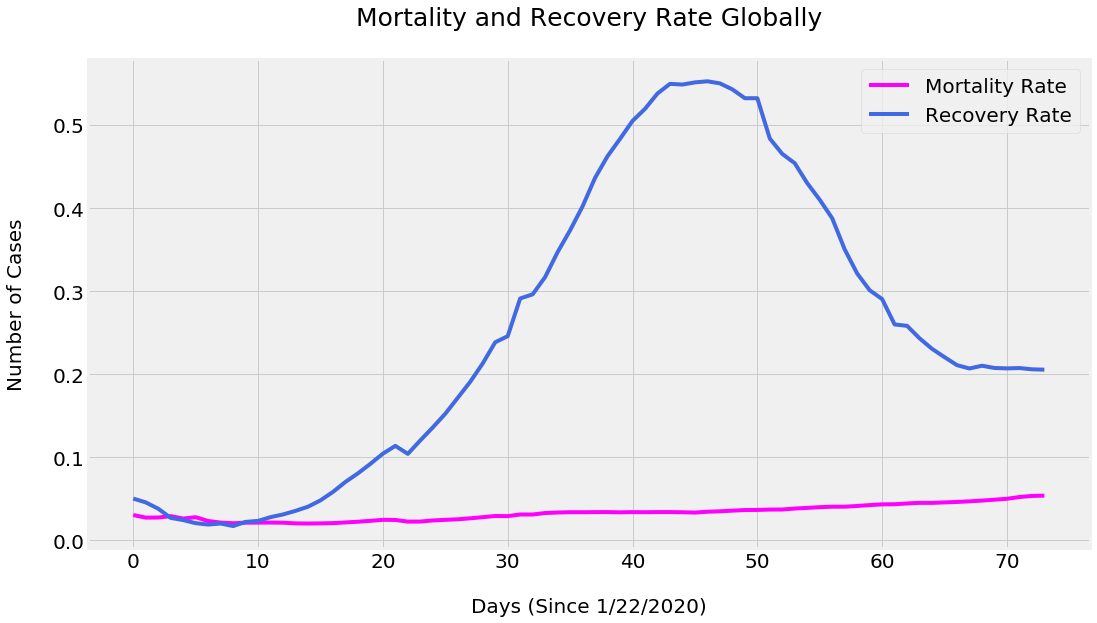

In [38]:
plt.figure(figsize=(16, 9))
plt.plot(days, mortality_rate, color='magenta')
plt.plot(days, recovery_rate, color='royalblue')
plt.title('Mortality and Recovery Rate Globally\n', size=25)
plt.xlabel('\nDays (Since 1/22/2020)', size=20)
plt.ylabel('Number of Cases\n', size=20)
plt.legend(['Mortality Rate', 'Recovery Rate'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

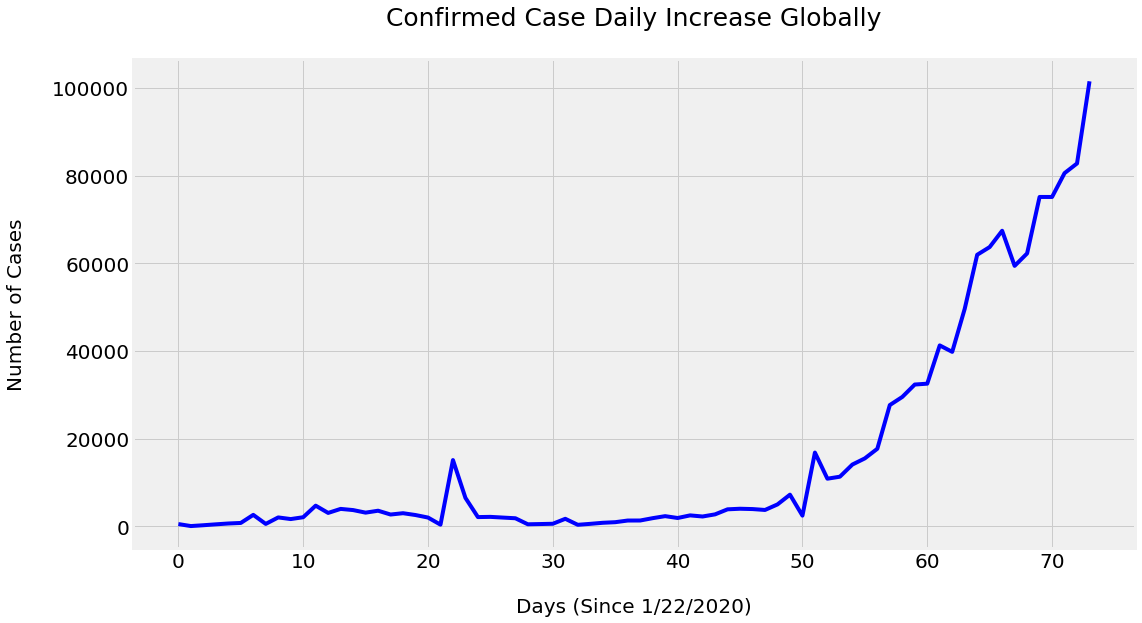

In [39]:
world_daily_increase = daily_increase(world_cases)

plt.figure(figsize=(16, 9))
plt.plot(days, world_daily_increase, color='blue')
plt.title('Confirmed Case Daily Increase Globally\n', size=25)
plt.xlabel('\nDays (Since 1/22/2020)', size=20)
plt.ylabel('Number of Cases\n', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

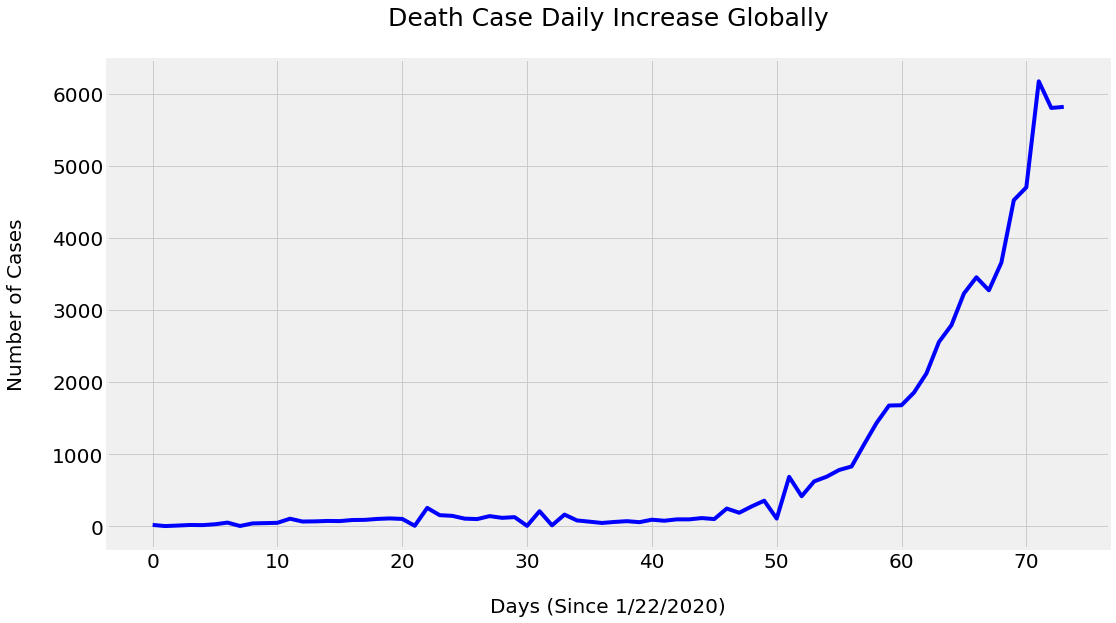

In [40]:
death_daily_increase = daily_increase(total_deaths)

plt.figure(figsize=(16, 9))
plt.plot(days, death_daily_increase, color='blue')
plt.title('Death Case Daily Increase Globally\n', size=25)
plt.xlabel('\nDays (Since 1/22/2020)', size=20)
plt.ylabel('Number of Cases\n', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

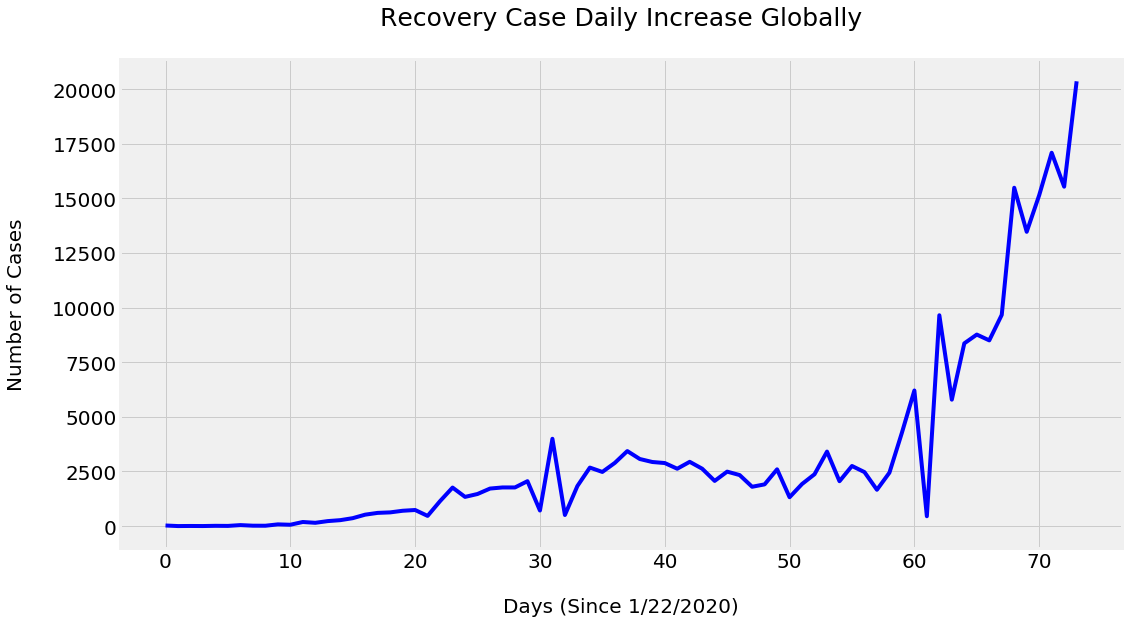

In [41]:
recovery_daily_increase = daily_increase(total_recovered)

plt.figure(figsize=(16, 9))
plt.plot(days, recovery_daily_increase, color='blue')
plt.title('Recovery Case Daily Increase Globally\n', size=25)
plt.xlabel('\nDays (Since 1/22/2020)', size=20)
plt.ylabel('Number of Cases\n', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Compare Top 5 Most Confirmed Case Countries

In [42]:
df_sort = df_confirmed_group.sort_values([cols[-1]], ascending=False).reset_index(drop=True)
df_sort = df_sort.drop(['Lat', 'Long'], axis=1)
df_top5 = df_sort.head(5)
df_top5 = df_top5.set_index('Country/Region')
df_top5

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,58,60,68,74,98,118,149,217,262,402,518,583,959,1281,1663,2179,2727,3499,4632,6421,7783,13677,19100,25489,33276,43847,53740,65778,83836,101657,121478,140886,161807,188172,213372,243453,275586,308850
Spain,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,120,165,222,259,400,500,673,1073,1695,2277,2277,5232,6391,7798,9942,11748,13910,17963,20410,25374,28768,35136,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065,119199,126168
Italy,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138,63927,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242,119827,124632
Germany,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272,9257,12327,15320,19848,22213,24873,29056,32986,37323,43938,50871,57695,62095,66885,71808,77872,84794,91159,96092
France,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,191,204,288,380,656,959,1136,1219,1794,2293,2293,3681,4496,4532,6683,7715,9124,10970,12758,14463,16243,20123,22622,25600,29551,33402,38105,40708,45170,52827,57749,59929,65202,90848


In [43]:
df_top5 = df_top5.transpose()
df_top5.tail()

Country/Region,US,Spain,Italy,Germany,France
3/31/20,188172,95923,105792,71808,52827
4/1/20,213372,104118,110574,77872,57749
4/2/20,243453,112065,115242,84794,59929
4/3/20,275586,119199,119827,91159,65202
4/4/20,308850,126168,124632,96092,90848


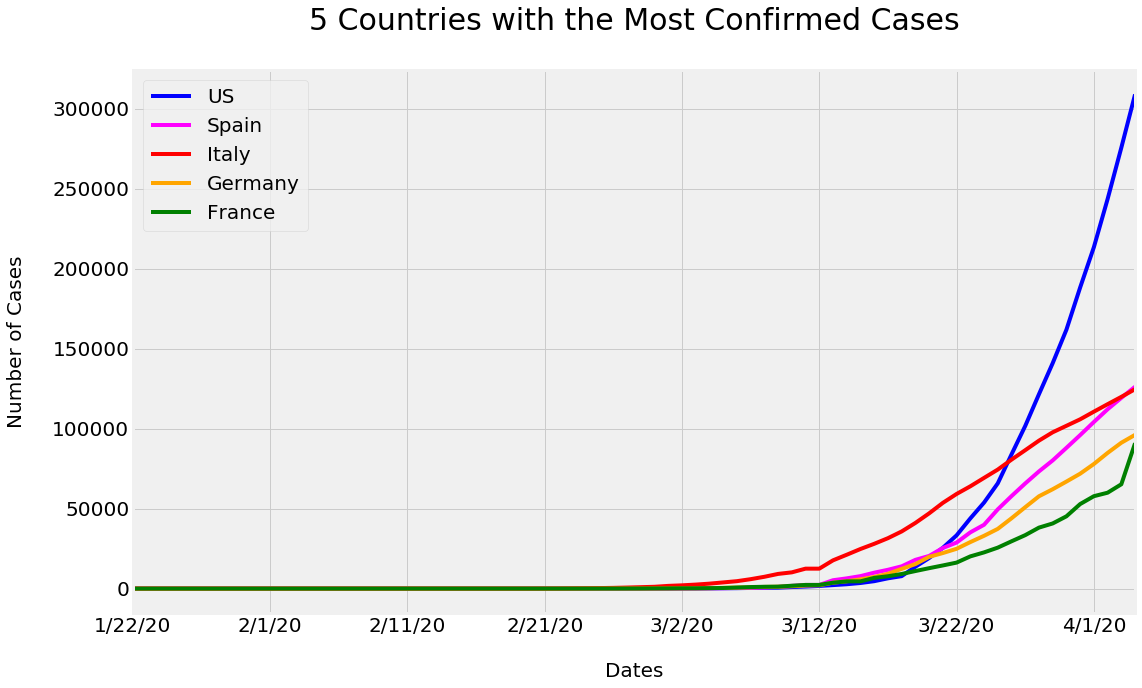

In [44]:
df_top5.plot(stacked=False, figsize=(16, 10), color=['blue', 'magenta', 'red', 'orange', 'green'])
plt.title('5 Countries with the Most Confirmed Cases\n', size=30)
plt.ylabel('Number of Cases\n', size=20)
plt.xlabel('\nDates', size=20)
plt.legend(prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)

plt.show()

### Create Informative New Dataframe 

In [45]:
list_mortality_rate = []
list_recovery_rate = []

c = df_confirmed_group.groupby('Country/Region')[cols[-1]].sum()
d = df_deaths_group.groupby('Country/Region')[cols[-1]].sum()
r = df_recoveries_group.groupby('Country/Region')[cols[-1]].sum()

mortality_rate_group = df_deaths_group['Country/Region'].map(d).fillna(0) / df_confirmed_group['Country/Region'].map(c).fillna(0)
recovery_rate_group = df_recoveries_group['Country/Region'].map(r).fillna(0) / df_confirmed_group['Country/Region'].map(c).fillna(0)
country = df_confirmed_group['Country/Region'].tolist()

mortality_percentage = mortality_rate_group * 100
recovery_percentage = recovery_rate_group * 100

ziplist = list(zip(country, c, d, r, mortality_rate_group, recovery_rate_group, round(mortality_percentage,2), round(recovery_percentage,2)))
df_rate = pd.DataFrame(ziplist, columns=['Country', 'Confirmed', 'Death', 'Recovery', 'Mortality Rate', 'Recovery Rate', 'Mortality %', 'Recovery %'])
df_rate.tail(10)

,Country,Confirmed,Death,Recovery,Mortality Rate,Recovery Rate,Mortality %,Recovery %
171,Ukraine,1225,32,25,0.026122,0.020408,2.61,2.04
172,United Arab Emirates,1505,10,125,0.006645,0.083056,0.66,8.31
173,United Kingdom,42477,4320,215,0.101702,0.005062,10.17,0.51
174,Uruguay,400,5,93,0.012500,0.232500,1.25,23.25
175,Uzbekistan,266,2,25,0.007519,0.093985,0.75,9.40
176,Venezuela,155,7,52,0.045161,0.335484,4.52,33.55
177,Vietnam,240,0,90,0.000000,0.375000,0.00,37.50
178,West Bank and Gaza,217,1,21,0.004608,0.096774,0.46,9.68
179,Zambia,39,1,2,0.025641,0.051282,2.56,5.13
180,Zimbabwe,9,1,0,0.111111,0.000000,11.11,0.00


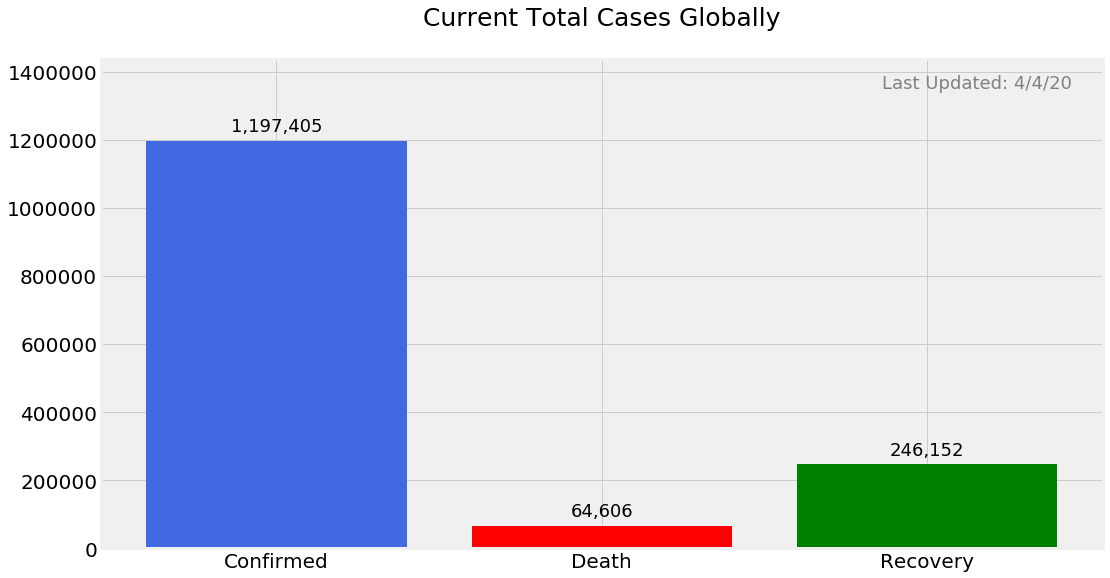

In [46]:
plt.figure(figsize=(16, 9))

a = [sum(c), sum(d), sum(r)]
bars = plt.bar(['Confirmed','Death','Recovery'], a, color=['royalblue','red','green'])
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height+70000, f'{height:,}', ha='center', va='top', size=18)

plt.title('Current Total Cases Globally\n', size=25)
plt.text(0.78, 0.94, 'Last Updated: '+cols[-1], size=18, transform=plt.gca().transAxes, color='gray')
plt.margins(0.05, 0.2)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Current Mortality, Recovery, and Active Cases Rate Globally

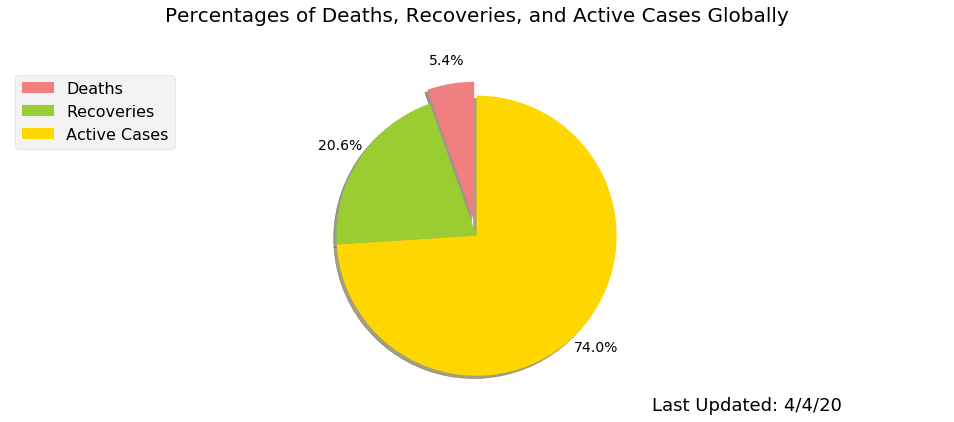

In [47]:
ap = round((sum(c)-sum(d)-sum(r))/sum(c)*100,1)  # active cases around the world
dp = round(sum(d)/sum(c)*100,1)
rp = round(sum(r)/sum(c)*100,1) 

colors = 'lightcoral', 'yellowgreen', 'gold'
labels = 'Deaths', 'Recoveries', 'Active Cases'
sizes = [dp, rp, ap]
explode = (0.1, 0, 0)  

fig1, ax1 = plt.subplots(figsize=(15,6))
ax1.pie(sizes, explode=explode, labels=None, autopct='%1.1f%%', colors=colors, shadow=True, pctdistance=1.17, startangle=90, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels=labels, loc='upper left', fontsize=16)
plt.title('Percentages of Deaths, Recoveries, and Active Cases Globally', y=1.12, size=20) 
plt.text(1.25,-1.25, 'Last Updated: '+cols[-1], size=18)

plt.show()

In [48]:
# function to generate barhplot

def barhplot(plotting_data):
    # generate plot
    plotting_data.plot(kind='barh', figsize=(16, 9), color='steelblue', width=0.8)
    plt.xlabel('\nNumber of Cases', size=20)
    plt.ylabel('Country\n', size=20)
    plt.rc('xtick',labelsize=20)
    plt.rc('ytick',labelsize=20)

    # annotate value labels to each country
    for index, value in enumerate(plotting_data): 
        label = f'{value:,}'
        #label = format(int(value)) # format int with commas
        plt.annotate(label, xy=(value, index), color='black', fontsize=16)

    plt.margins(0.1, 0.5)
    plt.text(0.78, 0.05, 'Last Updated: '+cols[-1], size=18, transform=plt.gca().transAxes, color='gray')
    plt.rcParams['axes.facecolor'] = '#eaeae9'
    plt.rcParams['axes.edgecolor'] = 'white'
    plt.rcParams['axes.axisbelow'] = True
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 1
    plt.rcParams['grid.color'] = "white"
    plt.show()
    
    return 

### Top 10 Most Confirmed Case Countries

In [49]:
confirmed_sort = df_rate.groupby(['Country'])['Confirmed'].sum().reset_index()
confirmed_sort = confirmed_sort.sort_values(['Confirmed'], ascending=True)
confirmed_sort.set_index('Country', inplace=True)
confirmed_top10 = confirmed_sort['Confirmed'].tail(10)

In [50]:
confirmed_top10

Country
Switzerland        20505
Turkey             23934
United Kingdom     42477
Iran               55743
China              82543
France             90848
Germany            96092
Italy             124632
Spain             126168
US                308850
Name: Confirmed, dtype: int64

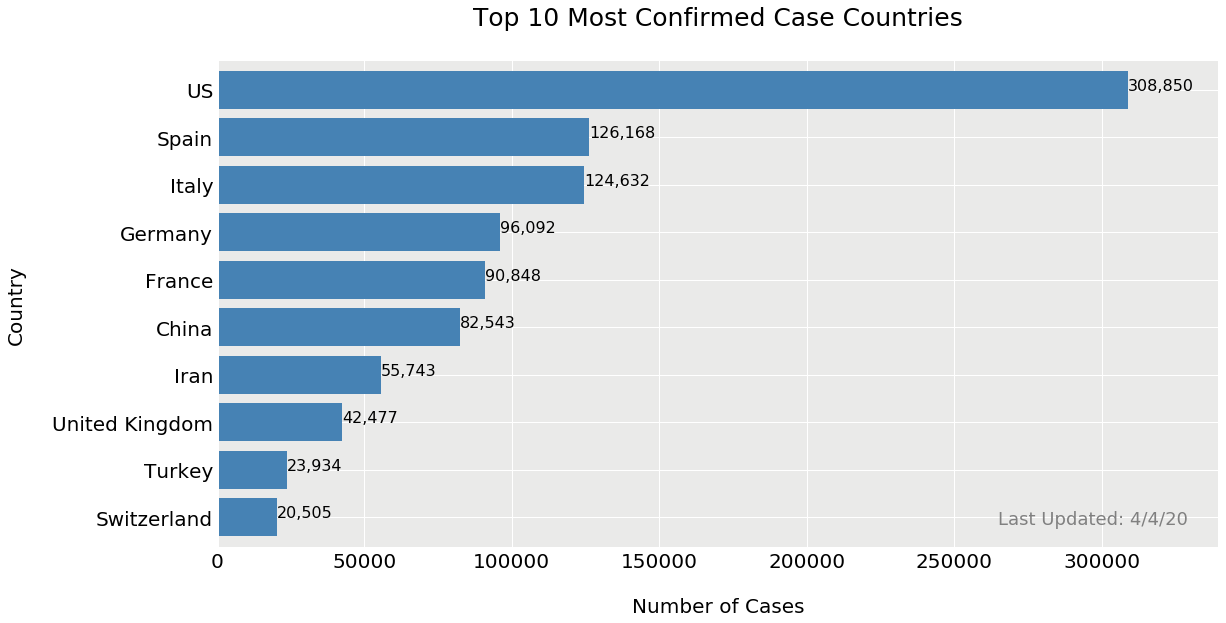

In [109]:
plt.title('Top 10 Most Confirmed Case Countries\n', fontsize=25)
barhplot(confirmed_top10)     # call barhplot function

### Top 10 Most Death Case Countries

In [52]:
death_sort = df_rate.groupby(['Country'])['Death'].sum().reset_index()
death_sort = death_sort.sort_values(['Death'], ascending=True)
death_sort.set_index('Country', inplace=True)
death_top10 = death_sort['Death'].tail(10)

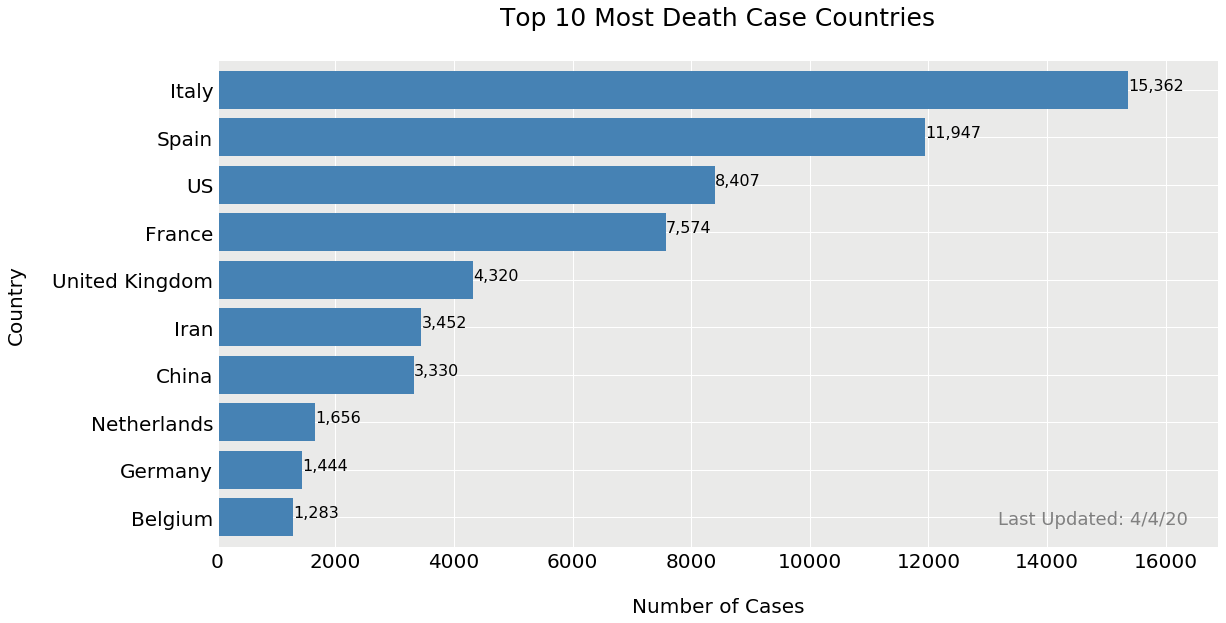

In [53]:
plt.title('Top 10 Most Death Case Countries\n', fontsize=25)
barhplot(death_top10)    # call barhplot function

### Top 10 Most Recovery Case Countries

In [54]:
recovery_sort = df_rate.groupby(['Country'])['Recovery'].sum().reset_index()
recovery_sort = recovery_sort.sort_values(['Recovery'], ascending=True)
recovery_sort.set_index('Country', inplace=True)
recovery_top10 = recovery_sort['Recovery'].tail(10)

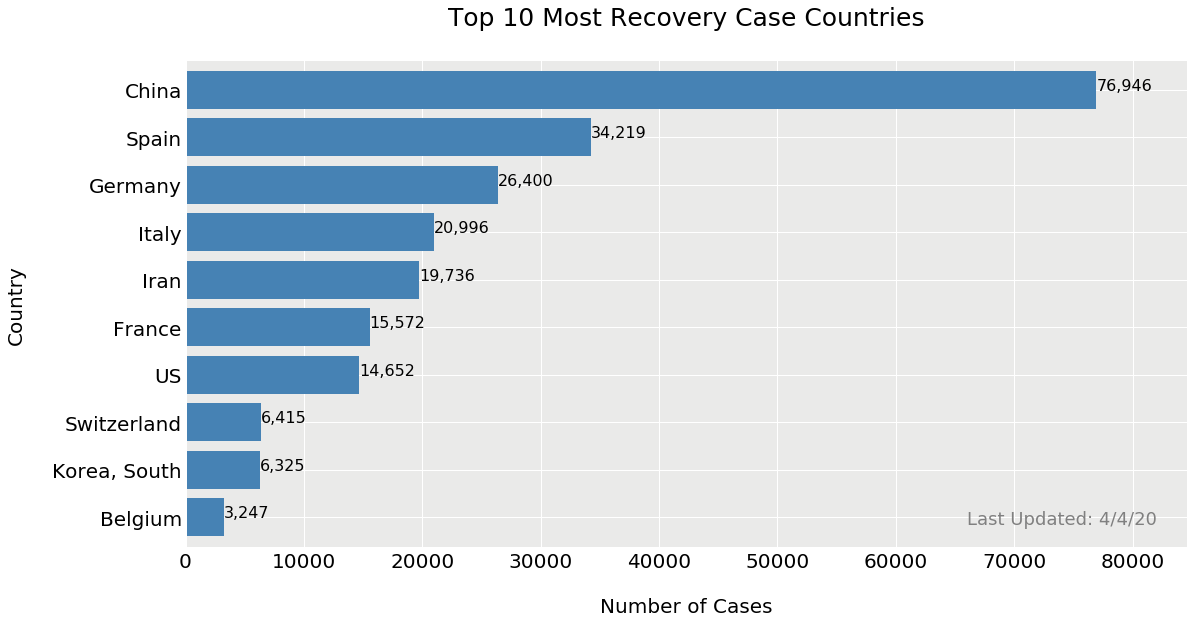

In [55]:
plt.title('Top 10 Most Recovery Case Countries\n', fontsize=25)
barhplot(recovery_top10)   # call barhplot function

### Top 20 Highest Mortality Case Countries

In [56]:
# function to generate bar plot
def barplot(plotting_data, colors, title):
    ax = plotting_data.plot(kind='bar', figsize=(20,11), width=0.8, color=colors, fontsize=20)

    # Show values of percentage on top of bar chart
    for p in ax.patches:
        ax.annotate('{:.2f} %'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()+0.5), fontsize=14)
  
    plt.legend(fontsize=20)
    plt.text(0.01, 0.96, 'Last Updated: '+cols[-1], size=18, transform=plt.gca().transAxes, color='gray')
    plt.margins(0, 0.2)
    plt.yticks([])
    plt.xlabel('')
    ax.set_title(title, fontsize=25)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    plt.show()
    
    return

In [57]:
confirmed_mor_rate_top20 = df_rate.drop(['Confirmed', 'Death', 'Recovery', 'Mortality Rate', 'Recovery Rate', 'Recovery %'], axis=1)
confirmed_mor_rate_top20 = confirmed_mor_rate_top20.sort_values(['Mortality %'], ascending=False).reset_index(drop=True)
confirmed_mor_rate_top20.set_index(['Country'], inplace=True)
confirmed_mor_rate_top20 = confirmed_mor_rate_top20.head(20)

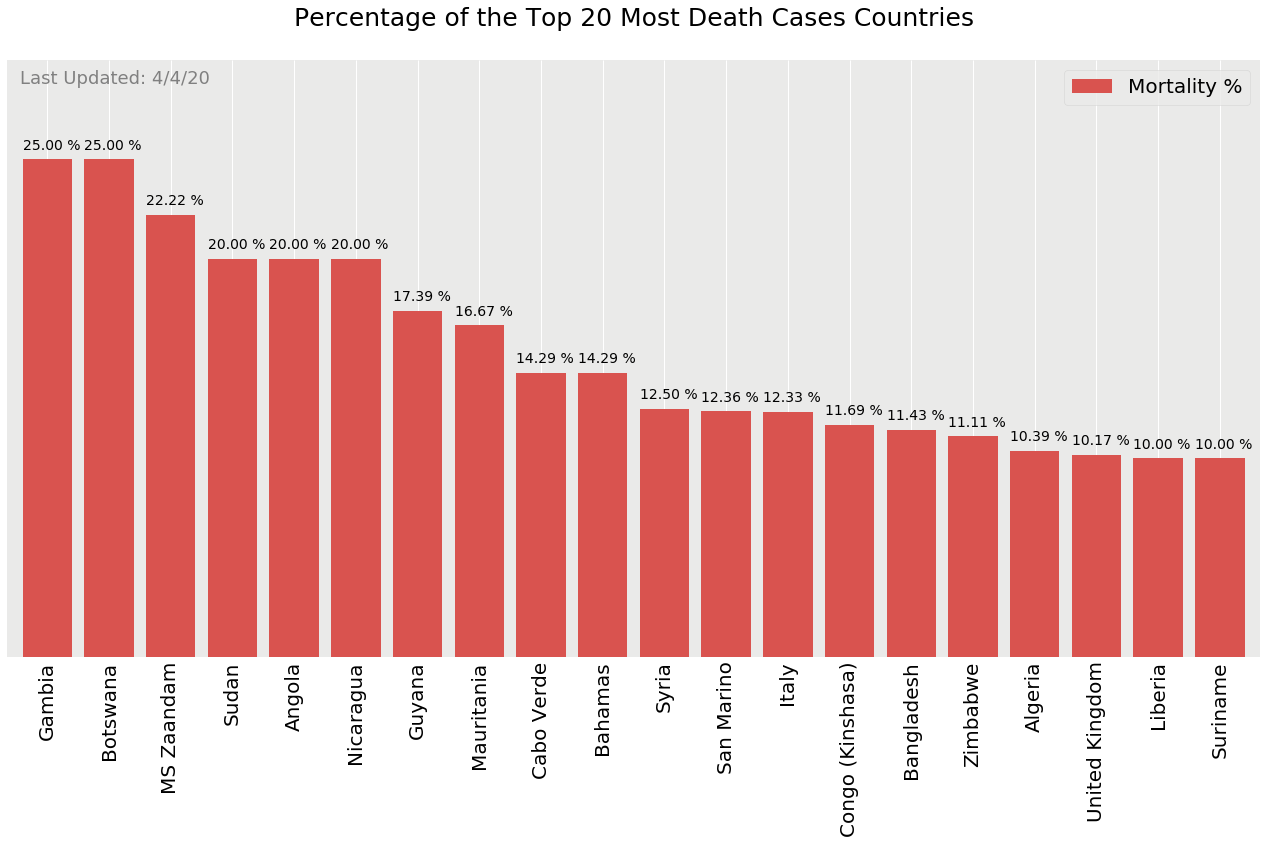

In [58]:
plot_title = 'Percentage of the Top 20 Most Death Cases Countries\n'
plot_color = '#d9534f'
barplot(confirmed_mor_rate_top20, plot_color, plot_title)     # call barplot function

Let's take a look the detail of that 20 countries.

In [59]:
mortality_rate_sort = df_rate.sort_values(['Mortality Rate'], ascending=False).reset_index(drop=True)
mortality_rate_top20 = mortality_rate_sort.head(20)
mortality_rate_top20

,Country,Confirmed,Death,Recovery,Mortality Rate,Recovery Rate,Mortality %,Recovery %
0,Gambia,4,1,2,0.250000,0.500000,25.00,50.00
1,Botswana,4,1,0,0.250000,0.000000,25.00,0.00
2,MS Zaandam,9,2,0,0.222222,0.000000,22.22,0.00
3,Sudan,10,2,2,0.200000,0.200000,20.00,20.00
4,Angola,10,2,2,0.200000,0.200000,20.00,20.00
5,Nicaragua,5,1,0,0.200000,0.000000,20.00,0.00
6,Guyana,23,4,0,0.173913,0.000000,17.39,0.00
7,Mauritania,6,1,2,0.166667,0.333333,16.67,33.33
8,Cabo Verde,7,1,0,0.142857,0.000000,14.29,0.00
9,Bahamas,28,4,0,0.142857,0.000000,14.29,0.00


### Top 20 Highest Recovery Case Countries

In [60]:
confirmed_rec_rate_top20 = df_rate.drop(['Confirmed', 'Death', 'Recovery', 'Mortality Rate', 'Recovery Rate', 'Mortality %'], axis=1)
confirmed_rec_rate_top20 = confirmed_rec_rate_top20.sort_values(['Recovery %'], ascending=False).reset_index(drop=True)
confirmed_rec_rate_top20.set_index(['Country'], inplace=True)
confirmed_rec_rate_top20 = confirmed_rec_rate_top20.head(20)

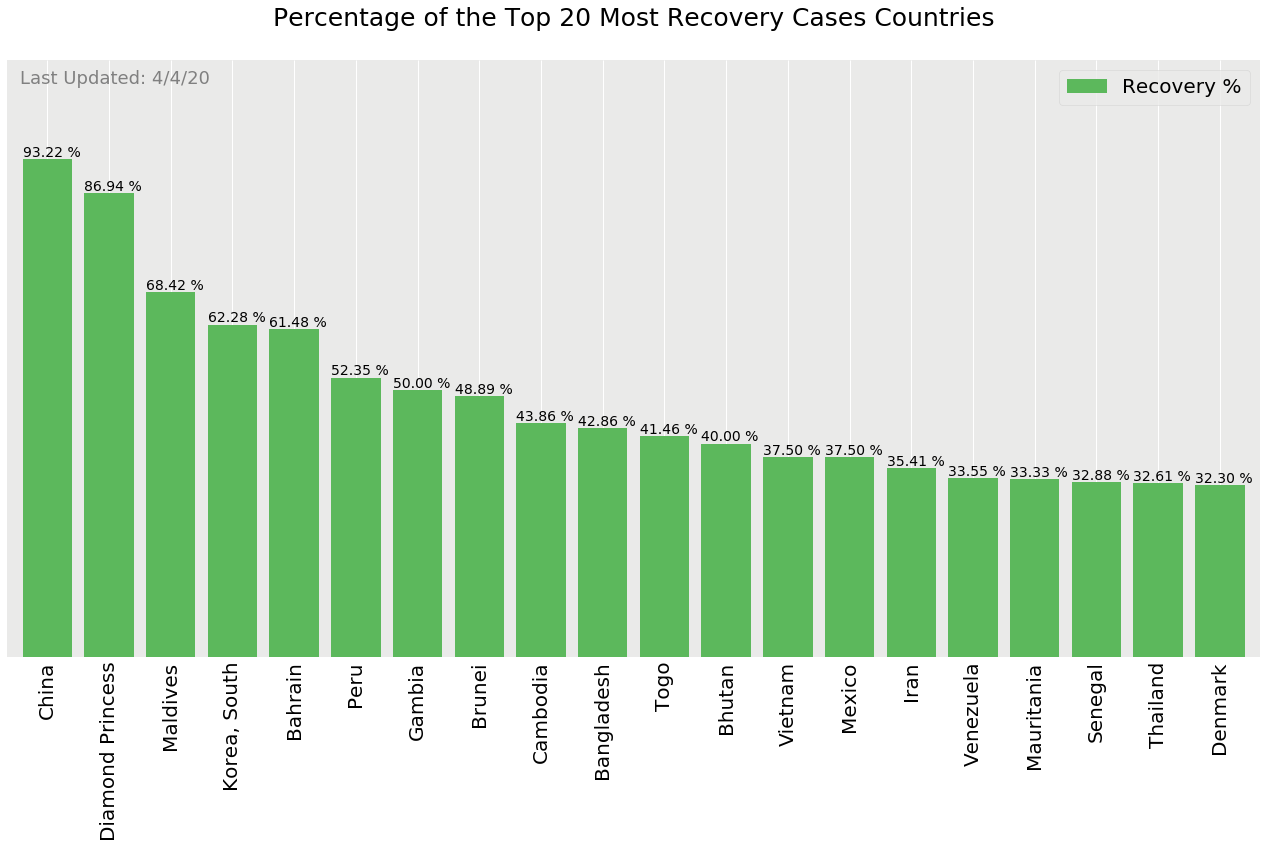

In [61]:
plot_title = 'Percentage of the Top 20 Most Recovery Cases Countries\n'
plot_color = '#5cb85c'
barplot(confirmed_rec_rate_top20, plot_color, plot_title)   # call barplot function

Let's take a look at that 20 countries.

In [62]:
recovery_rate_sort = df_rate.sort_values(['Recovery Rate'], ascending=False).reset_index(drop=True)
recovery_rate_top20 = recovery_rate_sort.head(20)
recovery_rate_top20

,Country,Confirmed,Death,Recovery,Mortality Rate,Recovery Rate,Mortality %,Recovery %
0,China,82543,3330,76946,0.040343,0.932193,4.03,93.22
1,Diamond Princess,712,11,619,0.015449,0.869382,1.54,86.94
2,Maldives,19,0,13,0.000000,0.684211,0.00,68.42
3,"Korea, South",10156,177,6325,0.017428,0.622785,1.74,62.28
4,Bahrain,688,4,423,0.005814,0.614826,0.58,61.48
5,Peru,1746,73,914,0.041810,0.523482,4.18,52.35
6,Gambia,4,1,2,0.250000,0.500000,25.00,50.00
7,Brunei,135,1,66,0.007407,0.488889,0.74,48.89
8,Cambodia,114,0,50,0.000000,0.438596,0.00,43.86
9,Bangladesh,70,8,30,0.114286,0.428571,11.43,42.86


### Mortality and Recovery Rate Percentages of Top 10 Most Confirmed Case Countries

Let's compare mortality and recovery rate of the top 10 most confirmed case countries.

In [63]:
df_mor_rec_percent = df_rate.sort_values(['Confirmed'], ascending=False).reset_index(drop=True)
df_mor_rec_percent = df_mor_rec_percent.drop(['Confirmed', 'Death', 'Recovery', 'Mortality Rate', 'Recovery Rate'], axis=1)
df_mor_rec_percent.set_index(['Country'], inplace=True)
df_mor_rec_percent = df_mor_rec_percent.head(10)
#df_mor_rec_percent = df_mor_rec_percent.sort_values(by='Mortality %', axis=0, ascending=False)

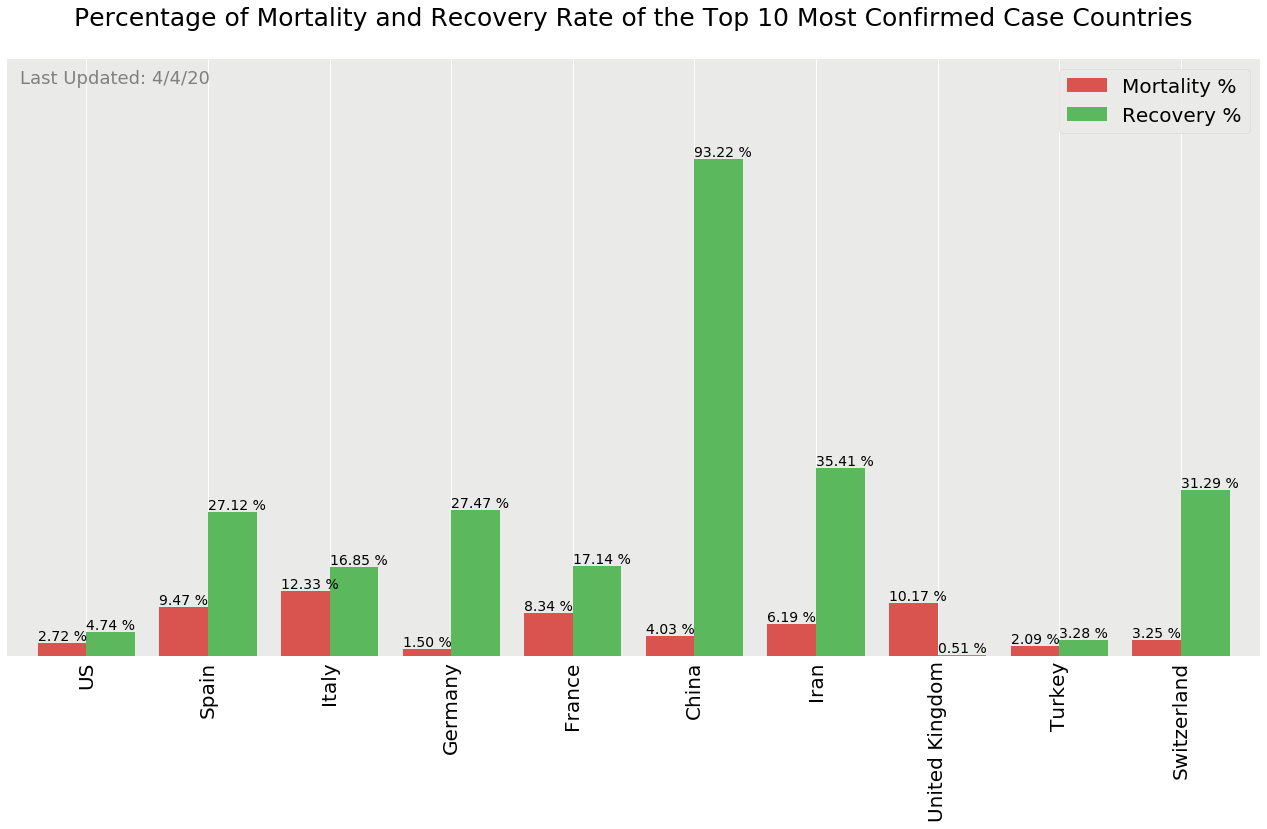

In [64]:
plot_title = 'Percentage of Mortality and Recovery Rate of the Top 10 Most Confirmed Case Countries\n'
plot_color = '#d9534f', '#5cb85c'
barplot(df_mor_rec_percent, plot_color, plot_title)     # call barplot function

Define the function to create new dataframe of the top 10 plus the sum of other countries to make better understanding. The function can be used for confirmed, death, as well as recovery cases.

In [65]:
# function to generate new dataframe of top10 and sum of others
def df_top10_other(top10, other):
    confirmed_other_sum = other['Confirmed'].sum()
    death_other_sum = other['Death'].sum()
    recovery_other_sum = other['Recovery'].sum()
    mortality_rate_other = death_other_sum / confirmed_other_sum
    recovery_rate_other = recovery_other_sum / confirmed_other_sum
    mortality_percentage_other = round(mortality_rate_other * 100, 2)
    recovery_percentage_other = round(recovery_rate_other * 100, 2)
    
    new_row = {'Country': 'Others',
               'Confirmed': confirmed_other_sum,
               'Death': death_other_sum,
               'Recovery': recovery_other_sum,
               'Mortality Rate': mortality_rate_other,
               'Recovery Rate': recovery_rate_other,
               'Mortality %': mortality_percentage_other,
               'Recovery %': recovery_percentage_other}

    top10_other = top10.append(new_row, ignore_index=True)
    top10_other.set_index('Country', inplace=True)
    
    return top10_other

Now, let's define the function to generate pie chart from that dataframe.

In [66]:
# function to generate pie chart
def piechart(data, title):
    colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'navy', 'silver', 'red', 'magenta', 'orange']
    explode_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1] # ratio for each country with which to offset each wedge.

    data.plot(kind='pie',
              figsize=(15, 6),
              autopct='%1.1f%%', 
              startangle=90,    
              shadow=True,       
              labels=None,         # turn off labels on pie chart
              pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
              colors=colors_list,
              explode=explode_list
              )

    # scale the title up by 12% to match pctdistance
    plt.title(title, y=1.12, size=20) 
    plt.text(1.25,-1.25, 'Last Updated: '+cols[-1], size=18)
    plt.axis('equal') 
    plt.legend(labels=data.index, loc='upper left', fontsize=16) 
    plt.show()
    
    return

### Top 10 Most Confirmed Countries VS Others

In [67]:
confirmed_case_sort = df_rate.sort_values(['Confirmed'], ascending=False).reset_index(drop=True)
confirmed_case_top10 = confirmed_case_sort.head(10)
confirmed_other = confirmed_case_sort.iloc[10:-1, :]

In [68]:
confirmed_top10_other = df_top10_other(confirmed_case_top10, confirmed_other)   # call the df_top10_other function
confirmed_top10_other['Confirmed']

Country
US                308850
Spain             126168
Italy             124632
Germany            96092
France             90848
China              82543
Iran               55743
United Kingdom     42477
Turkey             23934
Switzerland        20505
Others            225612
Name: Confirmed, dtype: int64

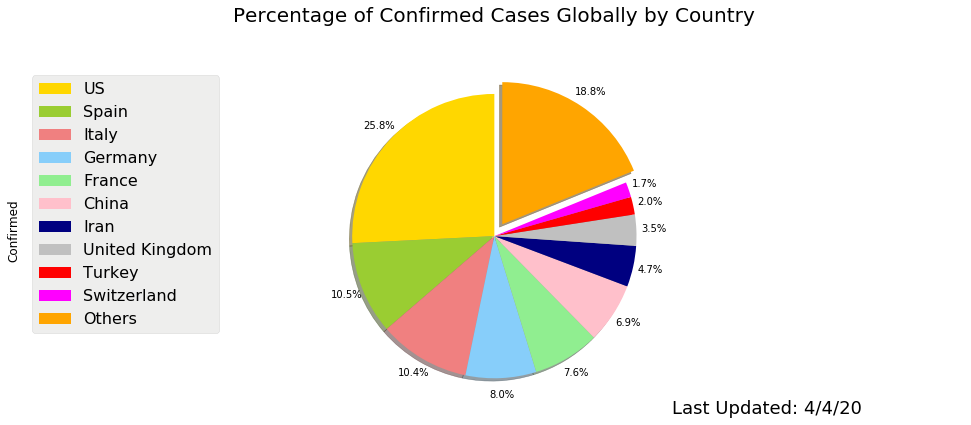

In [69]:
chart_title = 'Percentage of Confirmed Cases Globally by Country'
piechart(confirmed_top10_other['Confirmed'], chart_title)      # call piechart function

### Top 10 Most Death Case Countries VS Others

In [70]:
death_case_sort = df_rate.sort_values(['Death'], ascending=False).reset_index(drop=True)
death_case_top10 = death_case_sort.head(10)
death_other = death_case_sort.iloc[10:-1, :]

In [71]:
death_top10_other = df_top10_other(death_case_top10, death_other)    # call the df_top10_other function
death_top10_other['Death']

Country
Italy             15362
Spain             11947
US                 8407
France             7574
United Kingdom     4320
Iran               3452
China              3330
Netherlands        1656
Germany            1444
Belgium            1283
Others             5831
Name: Death, dtype: int64

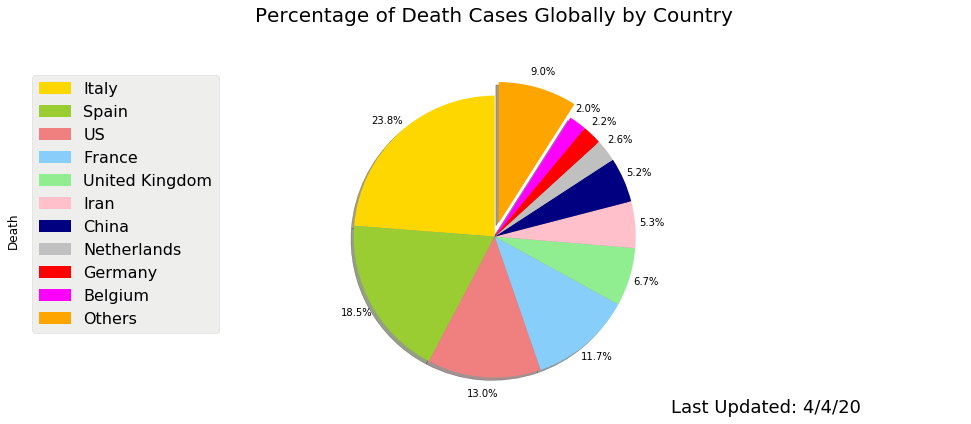

In [72]:
chart_title = 'Percentage of Death Cases Globally by Country'
piechart(death_top10_other['Death'], chart_title)     # call piechart function

### Top 10 Most Recovery Case Countries VS Others

In [73]:
recovery_case_sort = df_rate.sort_values(['Recovery'], ascending=False).reset_index(drop=True)
recovery_case_top10 = recovery_case_sort.head(10)
recovery_other = recovery_case_sort.iloc[10:-1, :]

In [74]:
recovery_top10_other = df_top10_other(recovery_case_top10, recovery_other)   # call the df_top10_other function
recovery_top10_other['Recovery']

Country
China           76946
Spain           34219
Germany         26400
Italy           20996
Iran            19736
France          15572
US              14652
Switzerland      6415
Korea, South     6325
Belgium          3247
Others          21644
Name: Recovery, dtype: int64

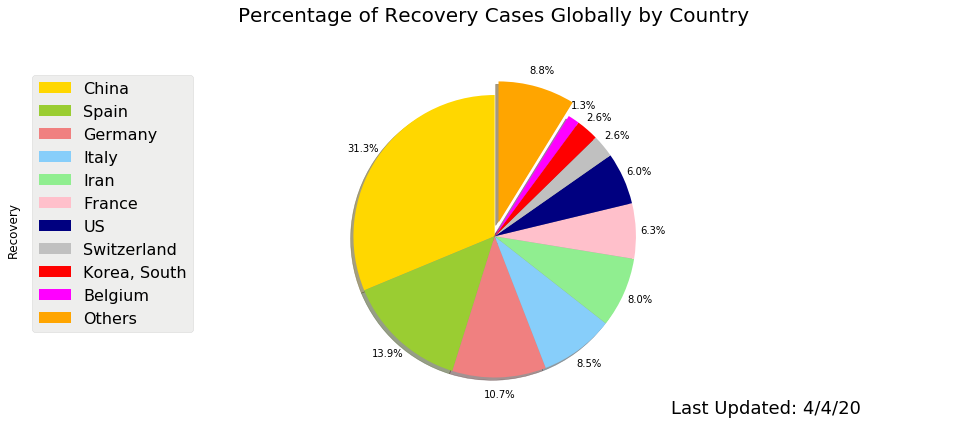

In [75]:
chart_title = 'Percentage of Recovery Cases Globally by Country'
piechart(recovery_top10_other['Recovery'], chart_title)    # call piechart function

# Modeling and Predicting the Number of COVID-19 Cases in the World<a id="8"></a>

### Train Test Split

For spliting the data, I use 80-20 proportion with 80% used for training data and 20% used for testing data. I also set the Shuffle parameter into False in order not to randomize the spliting. So, the first 80% of the data will be used as the training data dan the last 20% will be used as the testing data.

In [76]:
start_world = '1/22/2020'     # define the start date
start_date_world = datetime.datetime.strptime(start_world, '%m/%d/%Y')
future_forcast_world = np.array([i for i in range(len(dates)+10)]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)

future_forcast_dates_world = []
for i in range(len(future_forcast_world)):
    future_forcast_dates_world.append((start_date_world + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
    
# Train test split
X_train_confirmed_world, X_test_confirmed_world, y_train_confirmed_world, y_test_confirmed_world = train_test_split(days, world_cases, test_size=0.20, shuffle=False) 

### Polynomial Regression

MAE: 30253.971377467948
MSE: 1184842163.3712919


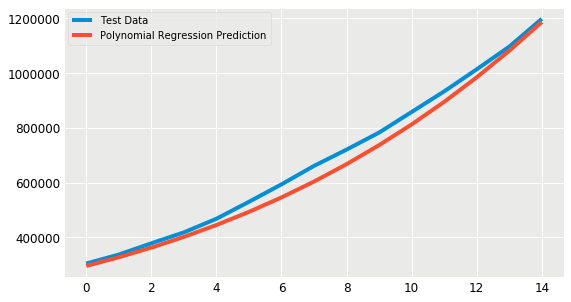

In [77]:
# transform our data for polynomial regression
poly_world = PolynomialFeatures(degree=5)
poly_X_train_confirmed_world = poly_world.fit_transform(X_train_confirmed_world)
poly_X_test_confirmed_world = poly_world.fit_transform(X_test_confirmed_world)
poly_future_forcast_world = poly_world.fit_transform(future_forcast_world)

# polynomial regression
linear_model_world = LinearRegression(fit_intercept=False)
linear_model_world.fit(poly_X_train_confirmed_world, y_train_confirmed_world)
test_linear_pred_world = linear_model_world.predict(poly_X_test_confirmed_world)
linear_pred_world = linear_model_world.predict(poly_future_forcast_world)

plt.figure(figsize=(8,5))
plt.plot(y_test_confirmed_world)
plt.plot(test_linear_pred_world)
plt.legend(['Test Data', 'Polynomial Regression Prediction'])
plt.xticks(size=12)
plt.yticks(size=12)

print('MAE:', mean_absolute_error(test_linear_pred_world, y_test_confirmed_world))
print('MSE:',mean_squared_error(test_linear_pred_world, y_test_confirmed_world))

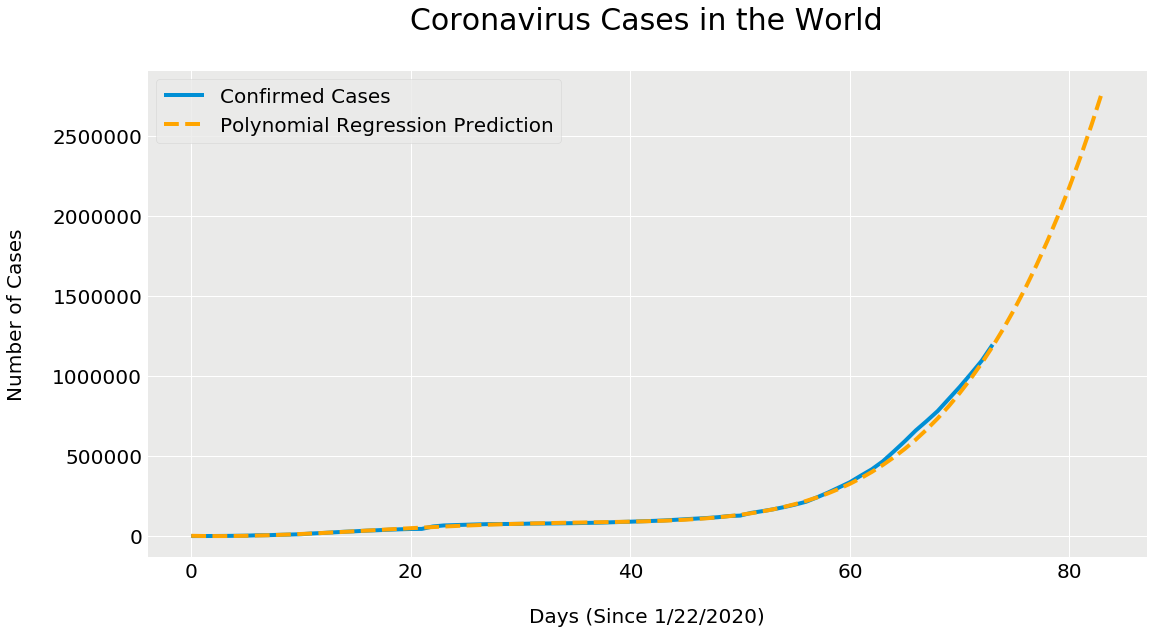

In [78]:
plt.figure(figsize=(16, 9))
plt.plot(days, world_cases)
plt.plot(future_forcast_world, linear_pred_world, linestyle='dashed', color='orange')
plt.title('Coronavirus Cases in the World\n', size=30)
plt.xlabel('\nDays (Since 1/22/2020)', size=20)
plt.ylabel('Number of Cases\n', size=20)
plt.legend(['Confirmed Cases', 'Polynomial Regression Prediction'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Result for Polynomial Regression

In [79]:
# Future predictions using Polynomial Regression 
linear_pred_world = linear_pred_world.reshape(1,-1)[0]
print('Polynomial regression\'s prediction for the next 10 days in the World :')
set(zip(future_forcast_dates_world[-10:], np.round(linear_pred_world[-10:])))

Polynomial regression's prediction for the next 10 days in the World :


{('04/05/2020', 1299094.0),
 ('04/06/2020', 1421314.0),
 ('04/07/2020', 1552907.0),
 ('04/08/2020', 1694377.0),
 ('04/09/2020', 1846245.0),
 ('04/10/2020', 2009048.0),
 ('04/11/2020', 2183341.0),
 ('04/12/2020', 2369696.0),
 ('04/13/2020', 2568702.0),
 ('04/14/2020', 2780967.0)}

### Bayesian Ridge

MAE: 21589.698657328914
MSE: 736592683.2737794


C:\Users\levono\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


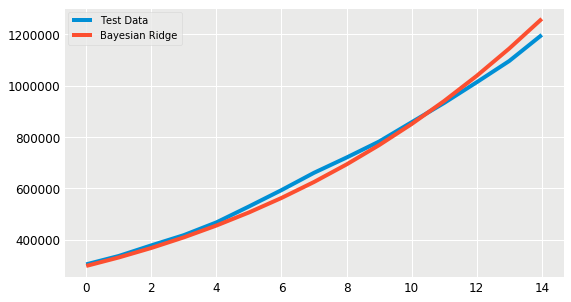

In [80]:
bayesian = BayesianRidge(fit_intercept=False)
bayesian.fit(poly_X_train_confirmed_world, y_train_confirmed_world)
test_bayesian_pred_world = bayesian.predict(poly_X_test_confirmed_world)
bayesian_pred_world = bayesian.predict(poly_future_forcast_world)

plt.figure(figsize=(8,5))
plt.plot(y_test_confirmed_world)
plt.plot(test_bayesian_pred_world)
plt.legend(['Test Data', 'Bayesian Ridge'])
plt.xticks(size=12)
plt.yticks(size=12)

print('MAE:', mean_absolute_error(test_bayesian_pred_world, y_test_confirmed_world))
print('MSE:',mean_squared_error(test_bayesian_pred_world, y_test_confirmed_world))

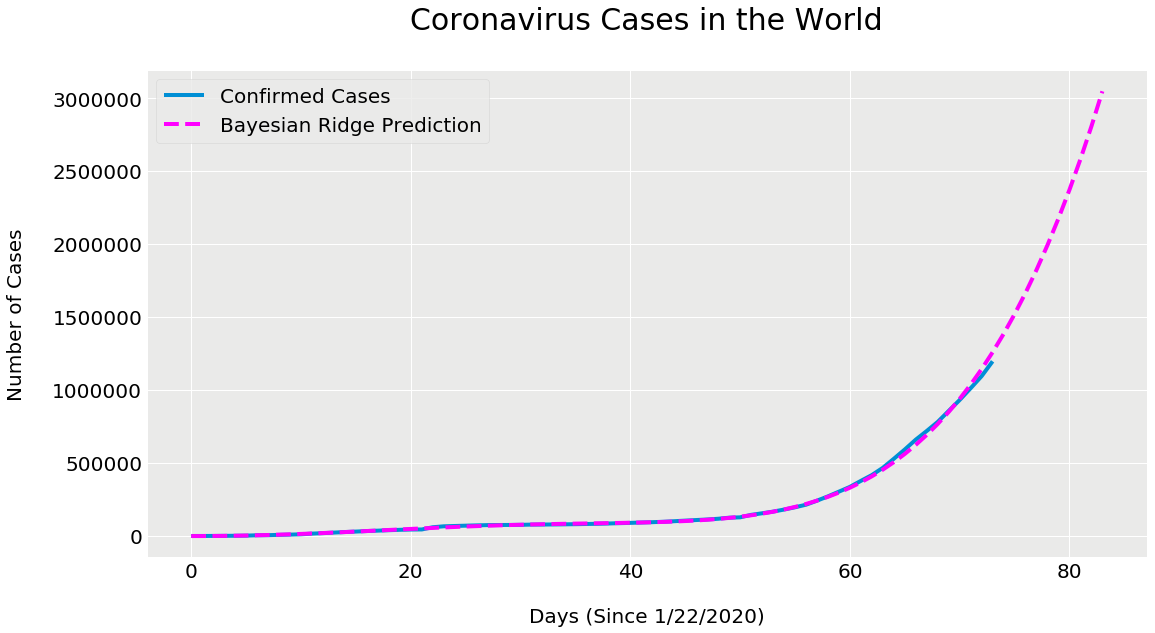

In [81]:
plt.figure(figsize=(16, 9))
plt.plot(days, world_cases)
plt.plot(future_forcast_world, bayesian_pred_world, linestyle='dashed', color='magenta')
plt.title('Coronavirus Cases in the World\n', size=30)
plt.xlabel('\nDays (Since 1/22/2020)', size=20)
plt.ylabel('Number of Cases\n', size=20)
plt.legend(['Confirmed Cases', 'Bayesian Ridge Prediction'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Result for Bayesian Ridge

In [82]:
# Future predictions using Bayesian Ridge
print('Bayesian Ridge\'s prediction for the next 10 days in the World :')
set(zip(future_forcast_dates_world[-10:], np.round(bayesian_pred_world[-10:])))

Bayesian Ridge's prediction for the next 10 days in the World :


{('04/05/2020', 1385052.0),
 ('04/06/2020', 1520447.0),
 ('04/07/2020', 1666673.0),
 ('04/08/2020', 1824342.0),
 ('04/09/2020', 1994091.0),
 ('04/10/2020', 2176577.0),
 ('04/11/2020', 2372482.0),
 ('04/12/2020', 2582508.0),
 ('04/13/2020', 2807383.0),
 ('04/14/2020', 3047854.0)}

### Support Vector Machine (SVM)

In [83]:
svm = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1, degree=8, C=0.1)
svm.fit(X_train_confirmed_world, y_train_confirmed_world)
svm_pred_world = svm.predict(future_forcast_world)

C:\Users\levono\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 45140.20516666633
MSE: 5696837423.586265


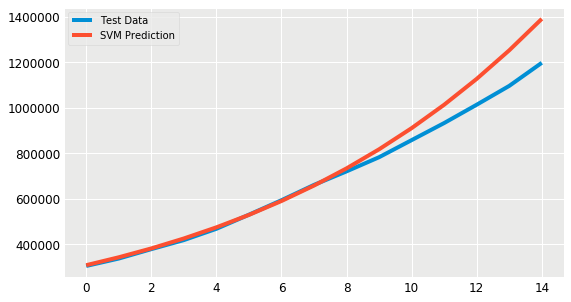

In [84]:
svm_test_pred_world = svm.predict(X_test_confirmed_world)

plt.figure(figsize=(8,5))
plt.plot(y_test_confirmed_world)
plt.plot(svm_test_pred_world)
plt.legend(['Test Data', 'SVM Prediction'])
plt.xticks(size=12)
plt.yticks(size=12)

print('MAE:', mean_absolute_error(svm_test_pred_world, y_test_confirmed_world))
print('MSE:',mean_squared_error(svm_test_pred_world, y_test_confirmed_world))

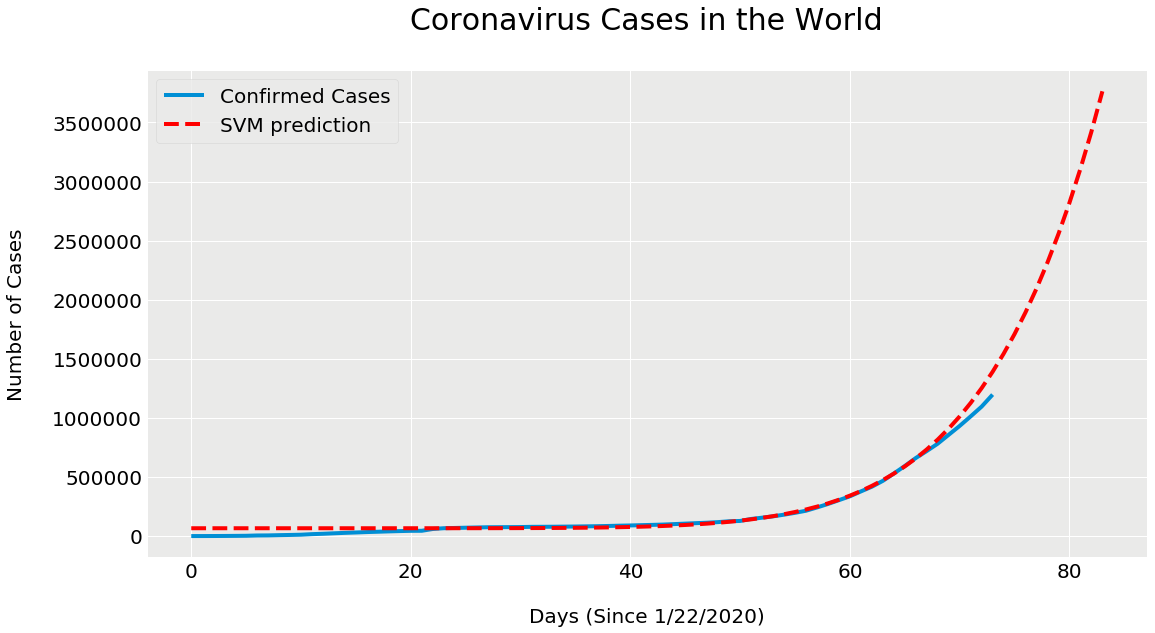

In [85]:
plt.figure(figsize=(16, 9))
plt.plot(days, world_cases)
plt.plot(future_forcast_world, svm_pred_world, linestyle='dashed', color='red')
plt.title('Coronavirus Cases in the World\n', size=30)
plt.xlabel('\nDays (Since 1/22/2020)', size=20)
plt.ylabel('Number of Cases\n', size=20)
plt.legend(['Confirmed Cases', 'SVM prediction'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

### Result for SVM

In [86]:
# Future predictions using SVM 
print('SVM\'s prediction for the next 10 days in the World:')
set(zip(future_forcast_dates_world[-10:], np.round(svm_pred_world[-10:])))

SVM's prediction for the next 10 days in the World:


{('04/05/2020', 1542784.0),
 ('04/06/2020', 1710110.0),
 ('04/07/2020', 1893803.0),
 ('04/08/2020', 2095218.0),
 ('04/09/2020', 2315800.0),
 ('04/10/2020', 2557092.0),
 ('04/11/2020', 2820739.0),
 ('04/12/2020', 3108492.0),
 ('04/13/2020', 3422217.0),
 ('04/14/2020', 3763898.0)}

# Conclusion<a id="10"></a>

The result of the prediction for the next 10 days for either Indonesia or the world cases so far will keep increasing, noted since the last this project run on 04/04/2020. If you run this notebook later, perhaps it will generate different result as the new data will keep added as long as the virus still exists and it will have an impact of the training and testing data as well as the prediction result.